# **1. Análisis de Reacciones Adversas a Vacunas contra COVID-19 (VAERS)**📊
Introducción y Objetivos


## **1.1 Introducción**

Este análisis se basa en un conjunto de datos disponible en **Kaggle**, derivado del Vaccine Adverse Event Reporting System (**VAERS**), un sistema de vigilancia administrado por los CDC y la FDA en Estados Unidos. VAERS recopila reportes voluntarios de eventos adversos ocurridos tras la vacunación, con el propósito de identificar señales tempranas que puedan requerir estudios más profundos.

🔗Link del Dataset disponible en Kaggle: https://www.kaggle.com/datasets/landfallmotto/covid19-vaccine-adverse-reactions-vaers-dataset/data

👉 **Importante:** VAERS es un sistema de notificación pasiva, lo que significa que depende de que las personas envíen sus experiencias de manera voluntaria. No está diseñado para establecer causalidad entre la vacuna y el evento reportado, pero resulta valioso para detectar posibles riesgos que ameritan investigación adicional.

- Sitio web: https://vaers.hhs.gov/

- Guía de datos del VAERS: https://drive.google.com/file/d/1QbebS5YN9Yt5nHpB7rDFHyReYd8NSNw5/view?usp=sharing


## **1.2 Objetivos del Análisis**

El objetivo de este trabajo es **explorar, limpiar y analizar** los registros de eventos adversos asociados a vacunas COVID-19 para:

*   Describir la distribución de eventos adversos según edad, sexo y fabricante de la vacuna.

*  Identificar los eventos adversos más frecuentes y su severidad.  

*   Aplicar modelos de *Machine Learning* para:  
        - Predecir hospitalización o desenlaces severos.  
         






# 2. Importación de Librerías 📑

In [ ]:
import pandas as pd
import numpy as np

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocesamiento y machine learning
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Modelos ML
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans

# Manejo de warnings (para limpiar outputs)
import warnings
warnings.filterwarnings('ignore')


# 3. Carga del Dataset e Información General 📈




## **3.1 Subir el archivo desde Google Drive:**

In [ ]:
import pandas as pd

file_path = '/content/drive/MyDrive/1.1. Data Science UTN BA/Proyecto FINAL/vaers_jan_nov_2021.csv'


# Opción recomendada para archivos grandes
df = pd.read_csv(file_path, low_memory=False, encoding='latin-1')




## **3.2 Dimensiones, Información General**

In [ ]:
# Dimensiones del dataset (filas, columnas)
print("Dimensiones:", df.shape)
df.head()


Dimensiones: (890836, 52)


,VAERS_ID,SYMPTOM1,SYMPTOMVERSION1,SYMPTOM2,SYMPTOMVERSION2,SYMPTOM3,SYMPTOMVERSION3,SYMPTOM4,SYMPTOMVERSION4,SYMPTOM5,...,CUR_ILL,HISTORY,PRIOR_VAX,SPLTTYPE,FORM_VERS,TODAYS_DATE,BIRTH_DEFECT,OFC_VISIT,ER_ED_VISIT,ALLERGIES
0,916600,Dysphagia,23.1,Epiglottitis,23.1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2,01/01/2021,NaN,Y,NaN,Pcn and bee venom
1,916601,Anxiety,23.1,Dyspnoea,23.1,NaN,NaN,NaN,NaN,NaN,...,Patient residing at nursing facility. See pati...,Patient residing at nursing facility. See pati...,NaN,NaN,2,01/01/2021,NaN,Y,NaN,"""Dairy"""
2,916602,Chest discomfort,23.1,Dysphagia,23.1,Pain in extremity,23.1,Visual impairment,23.1,NaN,...,NaN,NaN,NaN,NaN,2,01/01/2021,NaN,NaN,Y,Shellfish
3,916603,Dizziness,23.1,Fatigue,23.1,Mobility decreased,23.1,NaN,NaN,NaN,...,kidney infection,"diverticulitis, mitral valve prolapse, osteoar...","got measles from measel shot, mums from mumps ...",NaN,2,01/01/2021,NaN,NaN,NaN,"Diclofenac, novacaine, lidocaine, pickles, tom..."
4,916604,Injection site erythema,23.1,Injection site pruritus,23.1,Injection site swelling,23.1,Injection site warmth,23.1,NaN,...,Na,NaN,NaN,NaN,2,01/01/2021,NaN,NaN,NaN,Na


In [ ]:
# Información general del dataset
print("\n--- Información del dataset ---")
df.info()


--- Información del dataset ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890836 entries, 0 to 890835
Data columns (total 52 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   VAERS_ID         890836 non-null  int64  
 1   SYMPTOM1         890836 non-null  object 
 2   SYMPTOMVERSION1  890836 non-null  float64
 3   SYMPTOM2         700014 non-null  object 
 4   SYMPTOMVERSION2  700014 non-null  float64
 5   SYMPTOM3         542889 non-null  object 
 6   SYMPTOMVERSION3  542889 non-null  float64
 7   SYMPTOM4         414887 non-null  object 
 8   SYMPTOMVERSION4  414887 non-null  float64
 9   SYMPTOM5         311516 non-null  object 
 10  SYMPTOMVERSION5  311516 non-null  float64
 11  VAX_TYPE         890836 non-null  object 
 12  VAX_MANU         890836 non-null  object 
 13  VAX_LOT          630254 non-null  object 
 14  VAX_DOSE_SERIES  887049 non-null  object 
 15  VAX_ROUTE        690043 non-null  object 
 16  VAX_S

# 4. Diccionario 📚

Los datos incluyen información sobre:
- **Vacunas:** Pfizer/BioNTech, Moderna y Johnson & Johnson (Janssen).  
- **Eventos adversos reportados:** síntomas principales y secundarios, severidad, hospitalización y fallecimiento.  
- **Características del paciente:** edad, sexo, alergias, enfermedades preexistentes.  
- **Información de vacunación:** tipo de vacuna, fabricante, dosis, fechas relevantes.  

**Ejemplos de variables incluidas:**

| Columna     | Descripción |
|-------------|-------------|
| VAERS_ID    | Número de identificación del reporte |
| SYMPTOM1-5  | Eventos adversos reportados (hasta 5 por paciente, según terminología MedDRA) |
| VAX_MANU    | Fabricante de la vacuna |
| AGE_YRS     | Edad del paciente en años |
| SEX         | Sexo del paciente |
| HOSPITAL    | Hospitalización (Sí/No) |
| DIED        | Fallecimiento (Sí/No) |



Para obtener más detalles sobre las características, consulte la guía de uso de datos de VAERS: https://drive.google.com/file/d/1QbebS5YN9Yt5nHpB7rDFHyReYd8NSNw5/view?usp=sharing  

🚩A su vez, se encuentran detalladas las caracteristicas de las 52 columnas del presente dataset, con su respectiva descripción, en el siguiente archivo: https://docs.google.com/spreadsheets/d/1VvoOLlDhtRsIJz-XC9Ey8-lF1kFRoIwP/edit?usp=sharing&ouid=113037223966888902578&rtpof=true&sd=true

# 5. Exploración inicial de las Variables (dataset crudo) 🔍

 **1. Separar tipos de variables (categórica/numérica)**

In [ ]:
df.info()
df.select_dtypes(include=['object']).columns   # categóricas
df.select_dtypes(include=['int64','float64']).columns   # numéricas


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890836 entries, 0 to 890835
Data columns (total 52 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   VAERS_ID         890836 non-null  int64  
 1   SYMPTOM1         890836 non-null  object 
 2   SYMPTOMVERSION1  890836 non-null  float64
 3   SYMPTOM2         700014 non-null  object 
 4   SYMPTOMVERSION2  700014 non-null  float64
 5   SYMPTOM3         542889 non-null  object 
 6   SYMPTOMVERSION3  542889 non-null  float64
 7   SYMPTOM4         414887 non-null  object 
 8   SYMPTOMVERSION4  414887 non-null  float64
 9   SYMPTOM5         311516 non-null  object 
 10  SYMPTOMVERSION5  311516 non-null  float64
 11  VAX_TYPE         890836 non-null  object 
 12  VAX_MANU         890836 non-null  object 
 13  VAX_LOT          630254 non-null  object 
 14  VAX_DOSE_SERIES  887049 non-null  object 
 15  VAX_ROUTE        690043 non-null  object 
 16  VAX_SITE         677970 non-null  obje

Index(['VAERS_ID', 'SYMPTOMVERSION1', 'SYMPTOMVERSION2', 'SYMPTOMVERSION3',
       'SYMPTOMVERSION4', 'SYMPTOMVERSION5', 'AGE_YRS', 'CAGE_YR', 'CAGE_MO',
       'HOSPDAYS', 'NUMDAYS', 'FORM_VERS'],
      dtype='object')

**2. Explorar variables categóricas: Valores únicos y frecuencias.**

In [ ]:
for col in df.select_dtypes(include=['object']).columns[:5]:  # ej. primeras 5
    print(f"\nColumna: {col}")
    print(df[col].value_counts(dropna=False).head(10))



Columna: SYMPTOM1
SYMPTOM1
Chills                     48524
Arthralgia                 35560
Dizziness                  29820
Fatigue                    24773
Headache                   23018
COVID-19                   22465
Asthenia                   19923
Pyrexia                    18331
Injection site erythema    16335
Pain                       13895
Name: count, dtype: int64

Columna: SYMPTOM2
SYMPTOM2
NaN                  190822
Headache              33782
Fatigue               31809
Chills                24936
Dizziness             19099
Pyrexia               18231
Pain                  17330
Pain in extremity     14642
Nausea                13832
Dyspnoea              11012
Name: count, dtype: int64

Columna: SYMPTOM3
SYMPTOM3
NaN                  347947
Headache              29922
Fatigue               22399
Pyrexia               20809
Pain                  19893
Nausea                15567
Pain in extremity     13599
Dizziness             10321
Myalgia                9443
Dy

**2´. Explorar variables categóricas: Cardinalidad de Categóricas**

In [ ]:
cat_cols = df.select_dtypes(include='object').columns
cardinalidad = df[cat_cols].nunique().sort_values(ascending=False)
print(cardinalidad)


SYMPTOM_TEXT       599417
OTHER_MEDS         237177
HISTORY            163603
LAB_DATA           143624
ALLERGIES          108130
SPLTTYPE            93555
CUR_ILL             56346
VAX_LOT             27030
PRIOR_VAX           26715
SYMPTOM1             7077
SYMPTOM2             6752
SYMPTOM3             6297
SYMPTOM4             5710
SYMPTOM5             5282
VAX_DATE             1199
ONSET_DATE            713
TODAYS_DATE           365
DATEDIED              325
RECVDATE              309
RPT_DATE               81
STATE                  64
VAX_SITE               11
V_ADMINBY               9
VAX_ROUTE               9
VAX_DOSE_SERIES         8
VAX_MANU                4
VAX_NAME                4
V_FUNDBY                4
SEX                     3
RECOVD                  3
VAX_TYPE                1
DIED                    1
DISABLE                 1
X_STAY                  1
HOSPITAL                1
ER_VISIT                1
L_THREAT                1
BIRTH_DEFECT            1
OFC_VISIT   

**3. Explorar variables numéricas: Distribución con .describe()**

In [ ]:
df.describe()


,VAERS_ID,SYMPTOMVERSION1,SYMPTOMVERSION2,SYMPTOMVERSION3,SYMPTOMVERSION4,SYMPTOMVERSION5,AGE_YRS,CAGE_YR,CAGE_MO,HOSPDAYS,NUMDAYS,FORM_VERS
count,8.908360e+05,890836.000000,700014.000000,542889.000000,414887.000000,311516.000000,819268.000000,728957.000000,1327.000000,65176.000000,799488.000000,890836.000000
mean,1.348523e+06,23.938168,23.938262,23.937684,23.939902,23.940053,50.053790,49.768582,0.061567,21.109120,28.330898,1.999589
std,2.682631e+05,0.250567,0.250345,0.251181,0.249035,0.250619,18.574649,18.740089,0.157421,1238.533017,595.442248,0.020265
min,9.166000e+05,23.100000,23.100000,23.100000,23.100000,23.100000,0.080000,0.000000,0.000000,1.000000,0.000000,1.000000
25%,1.120193e+06,24.000000,24.000000,24.000000,24.000000,24.000000,36.000000,35.000000,0.000000,2.000000,0.000000,2.000000
50%,1.316782e+06,24.000000,24.000000,24.000000,24.000000,24.000000,50.000000,50.000000,0.000000,3.000000,1.000000,2.000000
75%,1.587308e+06,24.000000,24.000000,24.000000,24.000000,24.000000,65.000000,64.000000,0.000000,7.000000,7.000000,2.000000
max,1.845804e+06,24.100000,24.100000,24.100000,24.100000,24.100000,119.000000,120.000000,1.000000,99999.000000,44224.000000,2.000000


**4. Duplicados**

In [ ]:
duplicados = df.duplicated().sum()
print(f"Cantidad de filas duplicadas: {duplicados}")


Cantidad de filas duplicadas: 1661


**4. Porcentaje de Valores Nulos**

In [ ]:
porcentaje_nulos = df.isnull().mean().sort_values(ascending=False) * 100
print(porcentaje_nulos)


ER_VISIT           99.994275
RPT_DATE           99.964528
V_FUNDBY           99.958915
X_STAY             99.928382
BIRTH_DEFECT       99.922432
CAGE_MO            99.851039
DATEDIED           98.359967
DIED               98.223691
DISABLE            97.535798
L_THREAT           97.467098
PRIOR_VAX          94.647275
HOSPDAYS           92.683726
HOSPITAL           89.905662
ER_ED_VISIT        83.352604
OFC_VISIT          77.134287
SPLTTYPE           72.342496
CUR_ILL            68.234333
SYMPTOM5           65.031049
SYMPTOMVERSION5    65.031049
LAB_DATA           59.975012
ALLERGIES          54.118266
SYMPTOMVERSION4    53.427230
SYMPTOM4           53.427230
OTHER_MEDS         42.876467
HISTORY            42.198340
SYMPTOM3           39.058480
SYMPTOMVERSION3    39.058480
VAX_LOT            29.251400
VAX_SITE           23.895083
VAX_ROUTE          22.539839
SYMPTOMVERSION2    21.420553
SYMPTOM2           21.420553
CAGE_YR            18.171583
STATE              10.729921
NUMDAYS       

## 5.1 📍Resumen Estadístico Inicial

En este apartado se presenta un primer resumen de las variables numéricas y categóricas **con el dataset crudo**, antes de realizar cualquier tipo de limpieza.  
Esto permite identificar rangos, valores atípicos y posibles problemas de calidad de datos.
- **Variables numéricas:** se muestran estadísticas como media, desviación estándar, mínimo, máximo y percentiles.  
- **Variables categóricas:** se observa la cantidad de valores, número de categorías únicas y la moda (valor más frecuente).  

In [ ]:
# Resumen de variables numéricas
df.describe().T


,count,mean,std,min,25%,50%,75%,max
VAERS_ID,890836.0,1.348523e+06,268263.086042,916600.00,1120192.75,1316782.5,1587308.25,1845804.0
SYMPTOMVERSION1,890836.0,2.393817e+01,0.250567,23.10,24.00,24.0,24.00,24.1
SYMPTOMVERSION2,700014.0,2.393826e+01,0.250345,23.10,24.00,24.0,24.00,24.1
SYMPTOMVERSION3,542889.0,2.393768e+01,0.251181,23.10,24.00,24.0,24.00,24.1
SYMPTOMVERSION4,414887.0,2.393990e+01,0.249035,23.10,24.00,24.0,24.00,24.1
SYMPTOMVERSION5,311516.0,2.394005e+01,0.250619,23.10,24.00,24.0,24.00,24.1
AGE_YRS,819268.0,5.005379e+01,18.574649,0.08,36.00,50.0,65.00,119.0
CAGE_YR,728957.0,4.976858e+01,18.740089,0.00,35.00,50.0,64.00,120.0
CAGE_MO,1327.0,6.156745e-02,0.157421,0.00,0.00,0.0,0.00,1.0
HOSPDAYS,65176.0,2.110912e+01,1238.533017,1.00,2.00,3.0,7.00,99999.0


In [ ]:
# Resumen de variables categóricas
df.describe(include=['object']).T


,count,unique,top,freq
SYMPTOM1,890836,7077,Chills,48524
SYMPTOM2,700014,6752,Headache,33782
SYMPTOM3,542889,6297,Headache,29922
SYMPTOM4,414887,5710,Pyrexia,22384
SYMPTOM5,311516,5282,Pyrexia,20354
VAX_TYPE,890836,1,COVID19,890836
VAX_MANU,890836,4,MODERNA,407296
VAX_LOT,630254,27030,Unknown,11094
VAX_DOSE_SERIES,887049,8,1,457939
VAX_ROUTE,690043,9,IM,397893


# 6. Limpieza 🧹

### **6.1 Manejo de Valores Nulos ≥25%**

In [ ]:
# Calcular el porcentaje de valores nulos por columna
null_percent = df.isnull().mean() * 100

# Filtrar columnas con 25% o más de valores nulos
high_null_cols = null_percent[null_percent >= 25].sort_values(ascending=False)

# Crear tabla con nombre de columna y porcentaje de nulos
tabla_nulos = pd.DataFrame({
    'Columna': high_null_cols.index,
    'Porcentaje de Nulos (%)': high_null_cols.values
})

# Mostrar la tabla
print("Columnas con ≥25% de valores nulos:")
display(tabla_nulos)

Columnas con ≥25% de valores nulos:


,Columna,Porcentaje de Nulos (%)
0,ER_VISIT,99.994275
1,RPT_DATE,99.964528
2,V_FUNDBY,99.958915
3,X_STAY,99.928382
4,BIRTH_DEFECT,99.922432
5,CAGE_MO,99.851039
6,DATEDIED,98.359967
7,DIED,98.223691
8,DISABLE,97.535798
9,L_THREAT,97.467098


El siguiente paso es comprar la tabla de columnas con alto porcentaje de valores nulos con el archivo diccionario de este data set, así podré establecer un criterio o considerar si eliminar columnas con altos porcentajes de valores nulos interferirá o no sobre mis objetivos previamente planteados.

In [ ]:
# Ruta al archivo desde Drive
ruta_diccionario = '/content/drive/MyDrive/1.1. Data Science UTN BA/Proyecto FINAL/Features.csv'

# Cargar el archivo CSV
diccionario = pd.read_csv(ruta_diccionario)

# Verificar las primeras filas
diccionario.head()


,Feature,Desription
0,VAERS_ID,VAERS Identification Number
1,SYMPTOM1,Adverse Event MedDRA Term 1
2,SYMPTOMVERSION1,MedDRA dictionary version number 1
3,SYMPTOM2,Adverse Event MedDRA Term 1
4,SYMPTOMVERSION2,MedDRA dictionary version number 2


In [ ]:
# Unir por nombre de variable
comparacion = pd.merge(tabla_nulos, diccionario, left_on='Columna', right_on='Feature', how='left')

# Mostrar tabla comparativa
display(comparacion)

,Columna,Porcentaje de Nulos (%),Feature,Desription
0,ER_VISIT,99.994275,ER_VISIT,Emergency Room or Doctor Visit
1,RPT_DATE,99.964528,RPT_DATE,Date Form Completed
2,V_FUNDBY,99.958915,V_FUNDBY,Type of funds used to purchase vaccines
3,X_STAY,99.928382,X_STAY,Prolongation of Existing Hospitalization
4,BIRTH_DEFECT,99.922432,BIRTH_DEFECT,Congenital anomaly or birth defect
5,CAGE_MO,99.851039,CAGE_MO,Calculated age of patient in months
6,DATEDIED,98.359967,DATEDIED,Date of Death
7,DIED,98.223691,DIED,Died
8,DISABLE,97.535798,DISABLE,Disability
9,L_THREAT,97.467098,L_THREAT,Life-Threatening Illness


### 6.1.1- Decisiones sobre columnas con ≥25% de nulos:


1. **DIED** (muerte) y **DATEDIED** (fecha de muerte) presentan porcentajes elevados y similares de valores nulos, probablemente porque la mayoría de los pacientes registrados no fallecieron. Sin embargo, solo resulta pertinente para los objetivos de análisis la información de DIED (si murió el paciente o no), por lo que se elimina la variable DATEDIED por redundancia.

- Por su parte, se imputarán los valores faltantes en la variable DIED (NAs) como “No Death”, es decir como "No fallecido" dado que esta información es clave para evaluar la severidad. Del mismo modo, en **HOSPITAL** (hospitalizado) los valores nulos (NAs) se interpretarán como “No”, es decir "No hospitalizado" y en **HOSPDAYS** (número de días hospitalizado) los valores nulos se imputaran como 0, dado que es una variable numérica.

2. En variables como **L_THREAT** (riesgo vital), **DISABLE** (discapacidad), **ER_ED_VISIT** y **OFC_VISIT** (visitas médicas), los valores nulos (NAs) se imputarán como “No ocurrió/No posee”, asumiendo ausencia del evento reportado, es decir, "Sin riesgo vital (no posee)", "sin discapacidad (no posee)", y "sin visita médica (no ocurrió)" respectivamente.

3. Las columnas **SYMPTOM3, SYMPTOM4, SYMPTOM5** y sus variantes contienen síntomas adicionales. Se imputarán los valores nulos (NAs) como “Sin síntomas adicionales”, ya que podrían aportar valor en el análisis de patrones.

4. Variables médicas contextuales como **LAB_DATA, OTHER_MEDS, CUR_ILL, HISTORY y ALLERGIES** se imputarán como “No se proporcionó información”,ya que proporcionan información médica contextual sobre el paciente que es potencialmente util para modelos de aprendizaje automático.

5. **VAX_LOT** (lote de la vacuna): podría ser  relevante para identificar problemas con lotes de vacunas específicos, pero la gran cantidad de valores únicos y datos faltantes dificulta esto en gran medida, por lo que se resuelve eliminar esta columna.

6. Finalmente, las siguientes variables serán descartadas por su baja relevancia frente a los objetivos planteados y por presentar porcentajes de nulos excesivos:
- **ER_VISIT** (Sala de emergencias o visita al médico),
- **RPT_DATE** (Fecha de finalización del formulario),
- **V_FUNDBY** (Tipo de fondos utilizados para comprar vacunas),
- **X_STAY** (Prolongación de la hospitalización existente),
- **BIRTH_DEFECT** (Anomalía congénita o defecto de nacimiento),
- **CAGE_MO** (Edad calculada del paciente en meses),
- **PRIOR_VAX** (Información sobre eventos de vacunación previos),
- **SPLTTYPE** (Número de informe del proyecto de inmunización/fabricante).
- **VAX_SITE** (sitio de vacunacion).





In [ ]:
# Imputar como "No Death"
df['DIED'] = df['DIED'].fillna('No Death')

# Imputar como 0 en la columna HOSPDAYS
df['HOSPDAYS'] = df['HOSPDAYS'].fillna(0)

# Imputar como "No Hospitalization" en la columna HOSPITAL
df['HOSPITAL'] = df['HOSPITAL'].fillna('No Hospitalization')

# Eliminar la columna DATEDIED si existe
if 'DATEDIED' in df.columns:
    df.drop(columns=['DATEDIED'], inplace=True)

In [ ]:
# Imputar como "N" (No) en variables binarias
variables_binarias = ['L_THREAT', 'DISABLE', 'ER_ED_VISIT', 'OFC_VISIT']
for var in variables_binarias:
    df[var] = df[var].fillna('No ocurrio/No posee')


In [ ]:
# Imputar como "Sin síntomas adicionales"
sintomas_adicionales = ['SYMPTOM3', 'SYMPTOM4', 'SYMPTOM5']
for col in sintomas_adicionales:
    df[col] = df[col].fillna('Sin síntomas adicionales')


In [ ]:
# Imputar como "No se proporcionó información"
contexto_medico = ['LAB_DATA', 'OTHER_MEDS', 'CUR_ILL', 'HISTORY', 'ALLERGIES']
for col in contexto_medico:
    df[col] = df[col].fillna('No se proporcionó información')


In [ ]:
# Eliminar columna VAX_LOT
df.drop(columns=['VAX_LOT'], inplace=True)


In [ ]:
# Eliminar variables con alta proporción de nulos y baja relevancia
columnas_a_eliminar = ['ER_VISIT', 'RPT_DATE', 'V_FUNDBY', 'X_STAY', 'BIRTH_DEFECT',
                       'CAGE_MO', 'PRIOR_VAX', 'SPLTTYPE']
df.drop(columns=columnas_a_eliminar, inplace=True)


In [ ]:
# Eliminar variables con alta proporción de nulos y baja relevancia
columnas_a_eliminar = ['VAX_SITE']
df.drop(columns=columnas_a_eliminar, inplace=True)


**Verificar que ya no existan columnas con ≥25% de nulos**

In [ ]:
# Recalcular porcentaje de nulos
porcentaje_nulos_actualizado = df.isnull().mean() * 100

# Verificar si quedan columnas con ≥25% de nulos
nulos_mayores_25 = porcentaje_nulos_actualizado[porcentaje_nulos_actualizado >= 25]

if nulos_mayores_25.empty:
    print("✅ No quedan columnas con 25% o más de valores nulos.")
else:
    print("⚠️ Aún hay columnas con ≥25% de nulos:")
    display(nulos_mayores_25)


⚠️ Aún hay columnas con ≥25% de nulos:


,0
SYMPTOMVERSION3,39.058480
SYMPTOMVERSION4,53.427230
SYMPTOMVERSION5,65.031049


In [ ]:
# Imputar como "Sin síntomas adicionales"
versiones_sintomas = ['SYMPTOMVERSION3', 'SYMPTOMVERSION4', 'SYMPTOMVERSION5']
for col in versiones_sintomas:
    df[col] = df[col].fillna('Sin síntomas adicionales')


In [ ]:
# Recalcular porcentaje de nulos
porcentaje_nulos_actualizado = df.isnull().mean() * 100

# Verificar si quedan columnas con ≥25% de nulos
nulos_mayores_25 = porcentaje_nulos_actualizado[porcentaje_nulos_actualizado >= 25]

if nulos_mayores_25.empty:
    print("✅ No quedan columnas con 25% o más de valores nulos.")
else:
    print("⚠️ Aún hay columnas con ≥25% de nulos:")
    display(nulos_mayores_25)


✅ No quedan columnas con 25% o más de valores nulos.


### **6.2 Manejo de Valores Nulos <25%**

In [ ]:
# Filtrar columnas con nulos entre 0% y <25%
nulos_menores_25 = porcentaje_nulos_actualizado[(porcentaje_nulos_actualizado > 0) & (porcentaje_nulos_actualizado < 25)].sort_values(ascending=False)

# Crear tabla
tabla_nulos_restantes = pd.DataFrame({
    'Columna': nulos_menores_25.index,
    'Porcentaje de Nulos (%)': nulos_menores_25.values
})

# Mostrar tabla
print("Columnas con menos del 25% de valores nulos (restantes por tratar):")
display(tabla_nulos_restantes)


Columnas con menos del 25% de valores nulos (restantes por tratar):


,Columna,Porcentaje de Nulos (%)
0,VAX_ROUTE,22.539839
1,SYMPTOM2,21.420553
2,SYMPTOMVERSION2,21.420553
3,CAGE_YR,18.171583
4,STATE,10.729921
5,NUMDAYS,10.254188
6,RECOVD,8.196458
7,AGE_YRS,8.033802
8,ONSET_DATE,6.297680
9,VAX_DATE,5.625839


Se vuelve a cruzar el inventario de columnas con nulos contra el diccionario de datos para facilitar la toma de decisiones

In [ ]:
# Asegurate de que la tabla de nulos tenga esta estructura
tabla_nulos_restantes.columns = ['Variable', 'Porcentaje de Nulos (%)']

# Unir con el diccionario por nombre de variable
comparacion_restante = pd.merge(tabla_nulos_restantes, diccionario, left_on='Variable', right_on='Feature', how='left')

# Mostrar tabla comparativa
display(comparacion_restante)

,Variable,Porcentaje de Nulos (%),Feature,Desription
0,VAX_ROUTE,22.539839,VAX_ROUTE,Vaccination Route
1,SYMPTOM2,21.420553,SYMPTOM2,Adverse Event MedDRA Term 1
2,SYMPTOMVERSION2,21.420553,SYMPTOMVERSION2,MedDRA dictionary version number 2
3,CAGE_YR,18.171583,CAGE_YR,Calculated age of patient in years
4,STATE,10.729921,STATE,State
5,NUMDAYS,10.254188,NUMDAYS,Number of days (Onset date - Vax. Date)
6,RECOVD,8.196458,RECOVD,Recovered
7,AGE_YRS,8.033802,AGE_YRS,Age in Years
8,ONSET_DATE,6.297680,ONSET_DATE,Adverse Event Onset Date
9,VAX_DATE,5.625839,VAX_DATE,Vaccination Date


### 6.2.1- Decisiones sobre columnas con <25% de valores nulos

Con base en la relevancia de cada variable respecto a los objetivos planteados y el porcentaje de datos faltantes, se definieron las siguientes decisiones:

*  Se resolvió **eliminar** :
   - La columna **VAX_ROUTE** (vía de administración), dado su escasa utilidad analítica y el elevado porcentaje de valores nulos.
   - **CAGE_YR** (edad calculada en años), por ser redundante con AGE_YRS y presentar mayor proporción de datos faltantes.
   - La columna **TODAYS_DATE** (Fecha de completado del formulario). al no aportar valor directo al análisis.

*   Imputar como **sin información**las siguientes variables:

    - **SYMPTOM2** (segundo síntoma reportado), que será tratado como “Sin segundo síntoma”.

    - **RECOVD2** (indicador de recuperación del paciente), que se imputará como “No informado”.

    - **SYMPTOMVERSION2** (Versión del diccionario MedDRA usado) que se imputará como “Versión desconocida” para conservar la estructura sin pérdida de registros.

Para preservar la integridad del análisis sin introducir sesgos, se adoptaron las siguientes estrategias adicionales:


*  Las variables **AGE_YRS** (edad del paciente) y **NUMDAYS** (intervalo entre vacunación y aparición de síntomas) serán imputadas mediante la mediana, con el objetivo de reducir la influencia de valores atípicos.

*  Las filas con valores faltantes en **ONSET_DATE** (fecha de aparición del evento adverso), **VAX_DATE** (fecha de vacunación) y **VAX_DOSE_SERIES** (número de dosis en la serie) serán eliminadas, dado que estas variables son fundamentales para el análisis temporal y de severidad.

*  La variable **STATE** (estado de residencia) será imputada como “Estado desconocido”, permitiendo conservar los registros sin comprometer la estructura del análisis.

*  Finalmente, en el caso de **SYMPTOM_TEXT** (descripción libre de síntomas), se opta por eliminar las filas con valores nulos, dado que representan un porcentaje mínimo y no afectan significativamente la representatividad del conjunto de datos.


In [ ]:
# Eliminar columnas si existen
columnas_a_eliminar = ['VAX_ROUTE']
for col in columnas_a_eliminar:
    if col in df.columns:
        df.drop(columns=[col], inplace=True)

In [ ]:
# Eliminar columna CAGE_YR
df.drop(columns=['CAGE_YR'], inplace=True)


In [ ]:
# Eliminar columna TODAYS_DATE
df.drop(columns=['TODAYS_DATE'], inplace=True)


In [ ]:
# Imputar SYMPTOM2 como "Sin segundo síntoma"
df['SYMPTOM2'] = df['SYMPTOM2'].fillna('Sin segundo síntoma')

# Imputar RECOVD como "No informado"
df['RECOVD'] = df['RECOVD'].fillna('N')

In [ ]:
# Imputar SYMPTOMVERSION2 como "Versión desconocida"
df['SYMPTOMVERSION2'] = df['SYMPTOMVERSION2'].fillna('Versión desconocida')


In [ ]:
# Imputar AGE_YRS con la mediana
df['AGE_YRS'] = df['AGE_YRS'].fillna(df['AGE_YRS'].median())

# Imputar NUMDAYS con la mediana
df['NUMDAYS'] = df['NUMDAYS'].fillna(df['NUMDAYS'].median())


In [ ]:
# Imputar variable categórica STATE como "Estado desconocido"
df['STATE'] = df['STATE'].fillna('Estado desconocido')


In [ ]:
# Eliminar filas con valores nulos en ONSET_DATE o VAX_DATE
df = df.dropna(subset=['ONSET_DATE', 'VAX_DATE'])


In [ ]:
# Eliminar filas con nulos en SYMPTOM_TEXT (0.04%)
df = df.dropna(subset=['SYMPTOM_TEXT'])


In [ ]:
# Eliminar filas con valores nulos en VAX_DOSE_SERIES
df = df.dropna(subset=['VAX_DOSE_SERIES'])


### **6. 3 Verificamos la ausencia de valores nulos en el Dataset**

In [ ]:
# Verificar si hay algún valor nulo en el dataset
total_nulos = df.isnull().sum().sum()

if total_nulos == 0:
    print("✅ El dataset está completamente limpio: no hay valores nulos.")
else:
    print(f"⚠️ Aún hay {total_nulos} valores nulos en el dataset.")
    # Mostrar resumen por columna
    resumen_nulos = df.isnull().sum()
    resumen_nulos = resumen_nulos[resumen_nulos > 0].sort_values(ascending=False)
    display(resumen_nulos)


✅ El dataset está completamente limpio: no hay valores nulos.


## **6.4 Resultados de la Limpieza del Dataset**

In [ ]:
# Mostrar cantidad de filas y columnas
print(f"El dataset final tiene {df.shape[0]} filas y {df.shape[1]} columnas.")

# Mostrar lista de nombres de columnas
columnas_conservadas = df.columns.tolist()
print("Variables conservadas post-limpieza:")
for col in columnas_conservadas:
    print(f"- {col}")


El dataset final tiene 811681 filas y 38 columnas.
Variables conservadas post-limpieza:
- VAERS_ID
- SYMPTOM1
- SYMPTOMVERSION1
- SYMPTOM2
- SYMPTOMVERSION2
- SYMPTOM3
- SYMPTOMVERSION3
- SYMPTOM4
- SYMPTOMVERSION4
- SYMPTOM5
- SYMPTOMVERSION5
- VAX_TYPE
- VAX_MANU
- VAX_DOSE_SERIES
- VAX_NAME
- RECVDATE
- STATE
- AGE_YRS
- SEX
- SYMPTOM_TEXT
- DIED
- L_THREAT
- HOSPITAL
- HOSPDAYS
- DISABLE
- RECOVD
- VAX_DATE
- ONSET_DATE
- NUMDAYS
- LAB_DATA
- V_ADMINBY
- OTHER_MEDS
- CUR_ILL
- HISTORY
- FORM_VERS
- OFC_VISIT
- ER_ED_VISIT
- ALLERGIES


# 7. Estadística Descriptiva: Gráficos y Hallazgos Iniciales.📉💡

### **7.1** **Gráfico de Distribución de edad de los pacientes (AGE_YRS).**


**Objetivo**: Identificar grupos etarios con mayor frecuencia de eventos adversos.
 A continuación se muestra un **histograma** que:
- Agrupa los valores de edad en rangos (bins), por ejemplo: 0–10, 10–20, 20–30…

- Cuenta cuántos reportes hay en cada rango de edad.

- Grafica esas frecuencias como barras verticales.

- Incluye una curva de densidad (kde=True) que suaviza la distribución para ver tendencias.

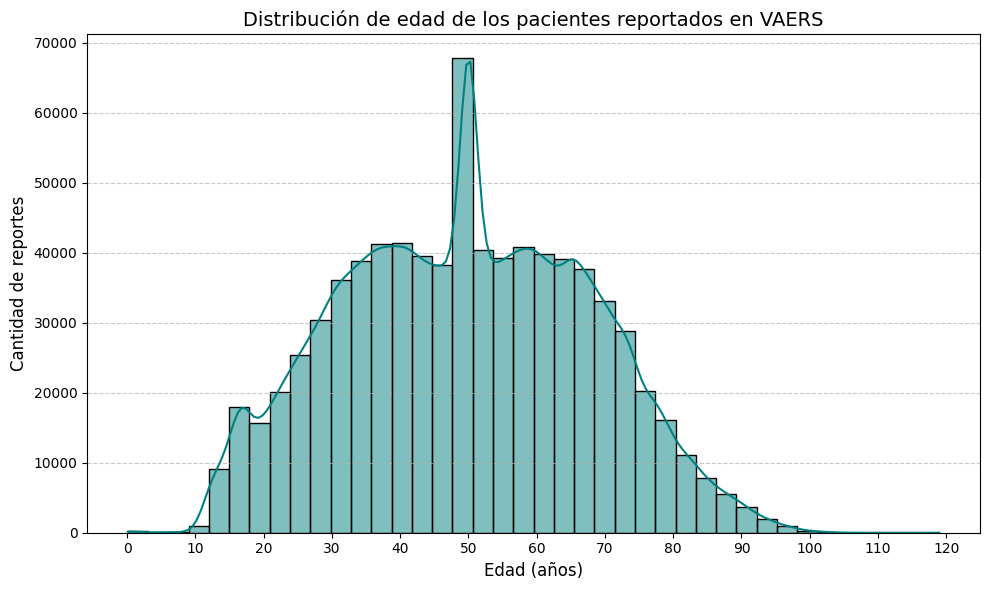

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(df['AGE_YRS'], bins=40, kde=True, color='teal')
plt.title('Distribución de edad de los pacientes reportados en VAERS', fontsize=14)
plt.xlabel('Edad (años)', fontsize=12)
plt.ylabel('Cantidad de reportes', fontsize=12)
plt.xticks(range(0, int(df['AGE_YRS'].max())+10, 10))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### **7.2 Gráfico de Frecuencia de eventos adversos por sexo (SEX)**

**Objetivo:** Comparar distribución de reportes entre géneros.

La variable SEX permite identificar posibles diferencias en la frecuencia de notificación entre géneros, lo cual puede estar influenciado por factores biológicos, conductuales o sociales. Esta visualización es clave para detectar sesgos de reporte y orientar futuros análisis hacia grupos poblacionales con mayor carga de eventos registrados.

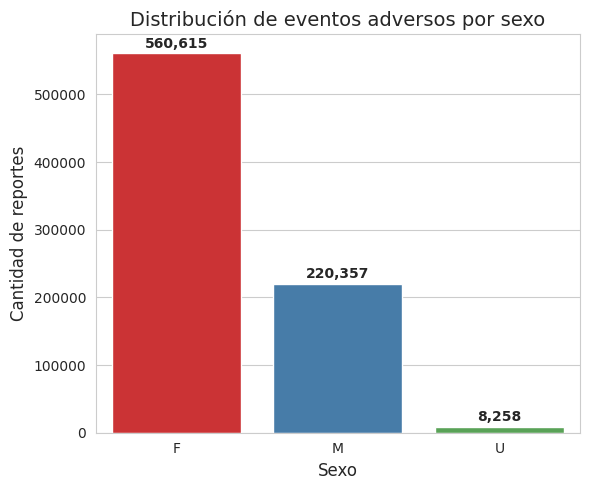

In [ ]:
# Configuración del gráfico
plt.figure(figsize=(6,5))
sns.set_style("whitegrid")

# Crear gráfico de barras ordenado por frecuencia
ax = sns.countplot(x='SEX', data=df, palette='Set1', order=df['SEX'].value_counts().index)

# Título y etiquetas
plt.title('Distribución de eventos adversos por sexo', fontsize=14)
plt.xlabel('Sexo', fontsize=12)
plt.ylabel('Cantidad de reportes', fontsize=12)

# Agregar etiquetas numéricas sobre cada barra
for p in ax.patches:
    height = int(p.get_height())
    ax.annotate(f'{height:,}',  # separador de miles
                xy=(p.get_x() + p.get_width() / 2, height),
                xytext=(0, 2),  # desplazamiento vertical
                textcoords='offset points',
                ha='center', va='bottom',
                fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()



### **7.3 Gráfico de Reportes de Eventos adversos por fabricante de vacuna (VAX_MANU)**

**Objetivo:**  identificar qué laboratorios concentran mayor volumen de notificaciones dentro del sistema VAERS, lo cual puede reflejar tanto su participación en campañas de vacunación como posibles diferencias en perfiles de reacto-genicidad o en el comportamiento de reportes.

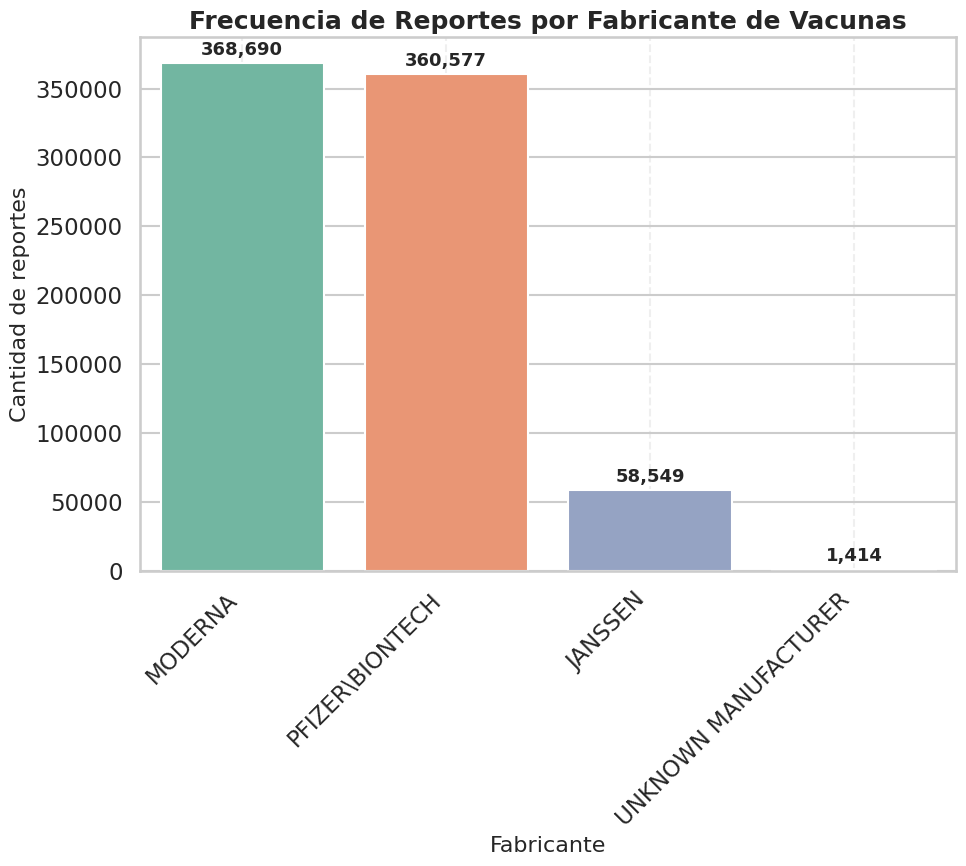

In [ ]:
# Estilo visual
sns.set_style("whitegrid")
sns.set_context("talk")

# Obtener los 10 fabricantes con más reportes
top_manus = df['VAX_MANU'].value_counts().nlargest(10)
fabricantes = top_manus.index
reportes = top_manus.values

# Crear gráfico de barras verticales con paleta contrastante
plt.figure(figsize=(10, 9))
palette = sns.color_palette("Set2", n_colors=len(fabricantes))
ax = sns.barplot(x=fabricantes, y=reportes, palette=palette)

# Título y etiquetas
plt.title("Frecuencia de Reportes por Fabricante de Vacunas", fontsize=18, weight='bold')
plt.xlabel("Fabricante", fontsize=16)
plt.ylabel("Cantidad de reportes", fontsize=16)

# Etiquetas numéricas sobre cada barra
for p in ax.patches:
    height = int(p.get_height())
    ax.annotate(f'{height:,}',  # separador de miles
                xy=(p.get_x() + p.get_width() / 2, height),
                xytext=(0, 3),
                textcoords='offset points',
                ha='center', va='bottom',
                fontsize=13, fontweight='bold')

# Rotar las etiquetas del eje x
plt.xticks(rotation=45, ha='right')

plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

### **7.4 Gráfico 4: Cantidad de reportes registrados en la base de datos por Mes/Año**

Este gráfico muestra la evolución mensual de los reportes de eventos adversos registrados en el website VAERS durante el período disponible en el dataset.

**Objetivo:**  identificar patrones temporales en la frecuencia de registro, lo cual puede reflejar el impacto de campañas de vacunación, cambios en la cobertura poblacional o variaciones en el comportamiento de reporte. Esta visualización permite contextualizar los hallazgos descriptivos previos y detectar posibles picos de interés epidemiológico.

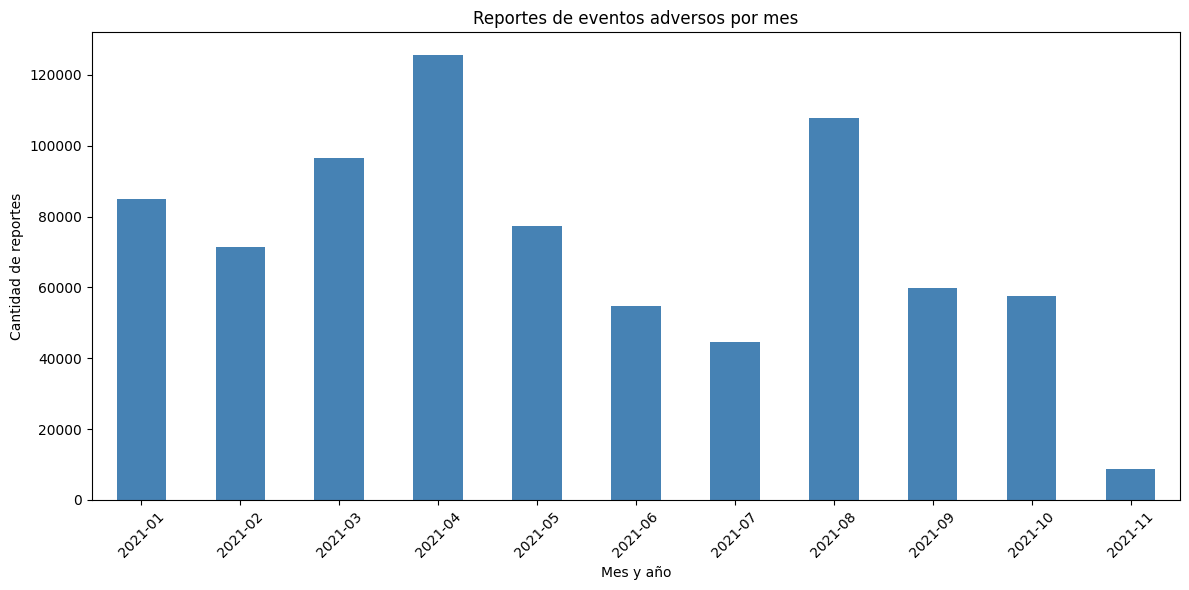

In [ ]:
df['RECVDATE'] = pd.to_datetime(df['RECVDATE'], errors='coerce')
df['mes_año'] = df['RECVDATE'].dt.to_period('M')
reportes_mensuales = df['mes_año'].value_counts().sort_index()

# Gráfico
plt.figure(figsize=(12,6))
reportes_mensuales.plot(kind='bar', color='steelblue')
plt.title('Reportes de eventos adversos por mes')
plt.xlabel('Mes y año')
plt.ylabel('Cantidad de reportes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
#Verificación del rango de la variable RECVDATE
print(df['RECVDATE'].min())
print(df['RECVDATE'].max())


2021-01-01 00:00:00
2021-11-05 00:00:00


### **7.5 Gráfico 5: Proporción de eventos adversos graves (EAG) registrados por mes**

Este gráfico muestra la proporción mensual de registros que implican eventos adversos graves, específicamente fallecimiento (DIED) y hospitalización (HOSPITAL).

**Objetivo:** observar cómo varía la frecuencia relativa de los reportes de eventos adversos graves dentro del sistema VAERS a lo largo del tiempo. Dado que los datos provienen de registros voluntarios, esta visualización permite explorar la dinámica del reporte y detectar posibles cambios en el comportamiento de notificación, sin asumir veracidad clínica ni representatividad poblacional.

<Figure size 1000x500 with 0 Axes>

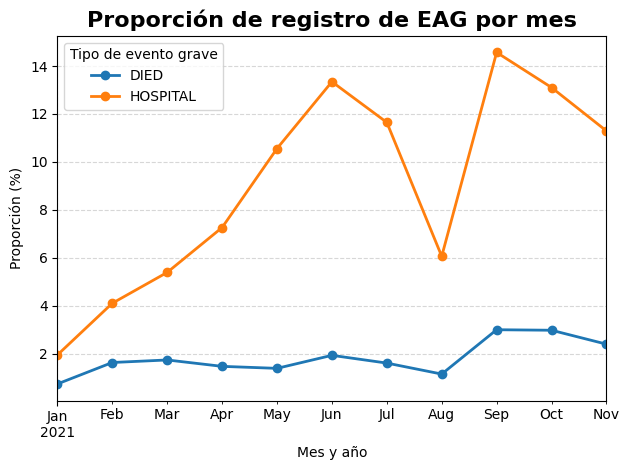

In [ ]:
# Asegurar formato de fecha
df['RECVDATE'] = pd.to_datetime(df['RECVDATE'], errors='coerce')
df['mes_año'] = df['RECVDATE'].dt.to_period('M')

# Calcular proporciones mensuales
graves = ['DIED', 'HOSPITAL']
proporciones = {}

for evento in graves:
    proporciones[evento] = (
        df[df[evento] == 'Y'].groupby('mes_año').size() /
        df.groupby('mes_año').size()
    ) * 100

# Crear DataFrame para graficar
df_proporciones = pd.DataFrame(proporciones).sort_index()

# Gráfico
plt.figure(figsize=(10,5))
df_proporciones.plot(marker='o', linewidth=2)
plt.title('Proporción de registro de EAG por mes', fontsize=16, weight='bold')
plt.xlabel('Mes y año')
plt.ylabel('Proporción (%)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Tipo de evento grave')
plt.tight_layout()
plt.show()




## 7.6 Hallazgos Iniciales💡

**1. Distribución de edad de los pacientes reportados:**

El histograma revela una **concentración marcada de reportes en adultos de mediana edad, con un pico alrededor de los 50 años.** La forma de la distribución sugiere que los eventos adversos se reportan con mayor frecuencia en este grupo etario, lo que podría estar relacionado con patrones de vacunación, mayor vigilancia clínica o una mayor propensión a reportar. La baja frecuencia en extremos etarios también plantea preguntas sobre subregistro o menor exposición.

**2. Frecuencia de eventos adversos por sexo:**

El gráfico muestra una diferencia significativa entre géneros: **las mujeres representan más del doble de reportes que los hombres.** Este sesgo puede reflejar factores biológicos (como diferencias inmunológicas), sociales (mayor disposición a reportar) o epidemiológicos (mayor cobertura vacunal en ciertos grupos). La categoría "desconocido" es marginal pero relevante para evaluar la calidad del dato.

**3. Eventos adversos por fabricante de vacuna:**

**MODERNA y PFIZER/BIONTECH concentran la mayoría de los reportes, seguidos por JANSSEN.** Este patrón puede estar influenciado por la distribución de dosis en campañas de vacunación, pero también podría reflejar diferencias en reactogenicidad, perfil de seguridad o percepción pública. La categoría "unknown MANUFACTURER" con baja frecuencia, sugiere inconsistencias en el registro o falta de especificación.

**4. Cantidad de Reportes Registrados en la Base de Datos por Mes/Año**

Observando las fechas de mes-año de las barras obtenidas en este gráfico, podemos notar que según el dataset post-limpieza, la variable RECVDATE solo contiene **registros entre enero y noviembre del año 2021.** Esto puede deberse a:

- El recorte temporal del archivo original descargado.

- Filtros aplicados durante la limpieza (por ejemplo, eliminación de registros sin fecha válida).

- Que el sistema VAERS haya tenido mayor volumen de carga en ese período.

**5. Proporción de Eventos Adversos Graves registrados por mes.**

El gráfico revela que, aunque la proporción de reportes con fallecimiento (DIED) se mantiene relativamente estable en torno al 2% durante todo el período, la proporción de reportes con hospitalización (HOSPITAL) muestra una variación más marcada. Se observa un incremento sostenido desde enero hasta un pico en junio (~ 14%), seguido de una disminución progresiva hasta agosto (~ 6%), y un nuevo pico alrededor de los meses de Septiembre-Octubre.

Este comportamiento sugiere una dinámica cambiante en el registro de eventos graves, posiblemente influida por factores como la evolución de la campaña de vacunación, la percepción pública del riesgo, o cambios en el comportamiento de notificación. Dado que los datos provienen de reportes voluntarios, esta visualización no permite inferir la severidad clínica real, pero sí aporta información valiosa sobre la variabilidad en la carga relativa de eventos graves reportados a lo largo del tiempo.

# 8. Elección del Modelo de Machine Learning 🖥️
 Modelo de Aprendizaje Automático Supervisado - Limitaciones del Dataset



Dado que el objetivo principal del trabajo es evaluar la seguridad de las vacunas a partir de reportes de eventos adversos, con especial énfasis en desenlaces graves, se opta por aplicar técnicas de **aprendizaje supervisado**. Este enfoque permite construir **modelos de clasificación** que estimen la probabilidad de ocurrencia de eventos graves en función de variables observadas como edad, sexo, fabricante, tipo de vacuna y síntomas reportados.

En este contexto, se define como variable objetivo (target) aquella que indica la presencia de hospitalización asociada al evento adverso reportado post-vacunación:

- **HOSPITAL**: hospitalización asociada al evento de vacunación (problema de clasificación binaria: Sí/No)

Se trabajará con un modelo de aprendizaje automático supervisado, utilizando algoritmos de clasificación apropiados para predecir la hospitalización.

**Elección del Modelo: Regresión Logística**

Para abordar este problema de clasificación binaria, la **Regresión Logística** es una elección adecuada y un excelente punto de partida. Sus ventajas incluyen:

1.  **Interpretabilidad:** Permite entender la influencia de cada característica (variables predictoras) en la probabilidad de que ocurra la hospitalización. Los coeficientes del modelo indican la dirección y magnitud de esta relación.
2.  **Eficiencia Computacional:** Es relativamente rápida de entrenar y predecir, incluso con grandes conjuntos de datos como este.
3.  **Buena Línea Base:** Proporciona una referencia sólida para comparar el rendimiento con modelos más complejos.

Alternativamente, un **Random Forest Classifier** podría ofrecer mayor precisión al capturar interacciones complejas entre variables, aunque a costa de una menor interpretabilidad directa. Dada la necesidad de entender los factores asociados a la hospitalización, la Regresión Logística es una opción transparente para un análisis inicial.

Las variables DIED (fallecimiento) y DISABLE (discapacidad) fueron excluidas como variables objetivo por diversas razones, incluyendo la posibilidad de representar condiciones preexistentes no necesariamente atribuibles directamente al evento adverso post-vacunal reportado, y para simplificar el enfoque del modelado a un único desenlace grave: la hospitalización.

El **aprendizaje supervisado (clasificación)** facilita:

- La identificación de patrones en los datos reportados asociados a mayor riesgo de hospitalización.
- La evaluación del poder explicativo de cada variable independiente para predecir este desenlace.
- La generación de métricas de desempeño (precisión, recall, F1-score, AUC, etc.) que permiten validar y comparar los modelos de clasificación.

## **🚨8.1 Limitaciones del Dataset**🚧

Es importante destacar que el sistema VAERS se basa en reportes voluntarios de personas por medio de un sitio web, lo que implica varias limitaciones:

- **Subregistro:** no todos los eventos adversos son reportados.

- **Sesgo de notificación:** ciertos grupos o tipos de eventos pueden reportarse con mayor frecuencia.

- **Falta de verificación clínica:** los reportes no siempre están validados por profesionales de salud, y los datos pueden no ser clínicamente confirmados.

- **Datos incompletos o inconsistentes:** algunas variables presentan valores faltantes, errores de entrada o ambigüedades.

Por lo tanto, los modelos construidos no deben interpretarse como estimaciones de riesgo clínico absoluto o causalidad, sino como herramientas exploratorias para detectar patrones en el comportamiento de reporte dentro del sistema VAERS y generar hipótesis para estudios clínicos o epidemiológicos posteriores.

En una segunda etapa, se podría complementar el análisis con técnicas de aprendizaje no supervisado (como clustering) para explorar subgrupos de pacientes que hayan reportado perfiles sintomáticos similares o identificar patrones inesperados en los datos.

# 9. 🤖 Modelo de Aprendizaje Automático Supervisado (Regresión Logística) para la variable target HOSPITAL.

### **1. Verificar el tipo de Dato**

Se verifica que no haya variables categóricas etiquetadas como numéricas o viceversa.

In [ ]:
# Verificar los tipos de datos actuales
tipos_actuales = df.dtypes.to_dict()
print("Tipos de datos actuales:")
for col, dtype in tipos_actuales.items():
    print(f"- {col}: {dtype}")

# Separar columnas por tipo de dato (considerando 'object' como categórica)
cat_cols = df.select_dtypes(include='object').columns.tolist()
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("\nVariables categóricas:")
print(cat_cols)

print("\nVariables numéricas:")
print(num_cols)

Tipos de datos actuales:
- VAERS_ID: int64
- SYMPTOM1: object
- SYMPTOMVERSION1: float64
- SYMPTOM2: object
- SYMPTOMVERSION2: object
- SYMPTOM3: object
- SYMPTOMVERSION3: object
- SYMPTOM4: object
- SYMPTOMVERSION4: object
- SYMPTOM5: object
- SYMPTOMVERSION5: object
- VAX_TYPE: object
- VAX_MANU: object
- VAX_DOSE_SERIES: object
- VAX_NAME: object
- RECVDATE: object
- STATE: object
- AGE_YRS: float64
- SEX: object
- SYMPTOM_TEXT: object
- DIED: object
- L_THREAT: object
- HOSPITAL: object
- HOSPDAYS: float64
- DISABLE: object
- RECOVD: object
- VAX_DATE: object
- ONSET_DATE: object
- NUMDAYS: float64
- LAB_DATA: object
- V_ADMINBY: object
- OTHER_MEDS: object
- CUR_ILL: object
- HISTORY: object
- FORM_VERS: int64
- OFC_VISIT: object
- ER_ED_VISIT: object
- ALLERGIES: object

Variables categóricas:
['SYMPTOM1', 'SYMPTOM2', 'SYMPTOMVERSION2', 'SYMPTOM3', 'SYMPTOMVERSION3', 'SYMPTOM4', 'SYMPTOMVERSION4', 'SYMPTOM5', 'SYMPTOMVERSION5', 'VAX_TYPE', 'VAX_MANU', 'VAX_DOSE_SERIES', 'VAX_NAME

Correcciones a realizar:
- La variable SYMPTOMVERSION1 es categórica no numérica (versión del formulario vears),
- Luego VAX_DOSE_SERIES (número de dosis de la vacuna administrada) y es numerica y está clasificada como categórica ("object").
- Finalmente ONSET_DAY, al igual que VAX_DATE y RECVDATE son fechas.

In [ ]:
# Verify current data types
print("Current data types before correction:")
print(df.dtypes)

# Correct data types based on user feedback
df['SYMPTOMVERSION1'] = df['SYMPTOMVERSION1'].astype(str) # Treat as categorical
df['VAX_DOSE_SERIES'] = pd.to_numeric(df['VAX_DOSE_SERIES'], errors='coerce') # Convert to numeric, coerce errors
df['ONSET_DATE'] = pd.to_datetime(df['ONSET_DATE'], errors='coerce') # Convert to datetime
df['VAX_DATE'] = pd.to_datetime(df['VAX_DATE'], errors='coerce') # Convert to datetime
df['RECVDATE'] = pd.to_datetime(df['RECVDATE'], errors='coerce') # Convert to datetime


# Re-verify data types
print("\nCurrent data types after correction:")
print(df.dtypes)

# Separate columns by data type
cat_cols = df.select_dtypes(include='object').columns.tolist()
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
date_cols = df.select_dtypes(include=['datetime64']).columns.tolist()

print("\nCategorical variables:")
print(cat_cols)

print("\nNumerical variables:")
print(num_cols)

print("\nDate variables:")
print(date_cols)

Current data types before correction:
VAERS_ID             int64
SYMPTOM1            object
SYMPTOMVERSION1    float64
SYMPTOM2            object
SYMPTOMVERSION2     object
SYMPTOM3            object
SYMPTOMVERSION3     object
SYMPTOM4            object
SYMPTOMVERSION4     object
SYMPTOM5            object
SYMPTOMVERSION5     object
VAX_TYPE            object
VAX_MANU            object
VAX_DOSE_SERIES     object
VAX_NAME            object
RECVDATE            object
STATE               object
AGE_YRS            float64
SEX                 object
SYMPTOM_TEXT        object
DIED                object
L_THREAT            object
HOSPITAL            object
HOSPDAYS           float64
DISABLE             object
RECOVD              object
VAX_DATE            object
ONSET_DATE          object
NUMDAYS            float64
LAB_DATA            object
V_ADMINBY           object
OTHER_MEDS          object
CUR_ILL             object
HISTORY             object
FORM_VERS            int64
OFC_VISIT        

### **2. Seleccionar las características (features) y la variable objetivo (target)**

Se define qué columnas se usarán como predictores (X) y cuál es la variable a predecir (En base al objetivo y - 'HOSPITAL').

Para las características (x), se incluyen solo las columnas identificadas como numéricas o categóricas, **excluyendo las columnas de fecha** por ahora, ya que requieren un tratamiento específico si se van a usar como features. Se excluye a la variable 'VAERS_ID' ya que es solo un identificador.

In [ ]:
# Definir la variable objetivo (y)
y = df['HOSPITAL']

# Definir las características (X)
# Excluimos 'HOSPITAL' (la variable objetivo), 'VAERS_ID' (identificador),
# y las columnas de fecha por ahora, ya que requieren un tratamiento específico si se van a usar como features.
X = df.drop(columns=['HOSPITAL', 'VAERS_ID'] + date_cols)

print("Variable objetivo (y) definida.")
print("Primeros 5 valores de y:")
print(y.head())

print("\nCaracterísticas (X) definidas.")
print("Primeras 5 filas de X:")
display(X.head())

print("\nColumnas en X:")
print(X.columns.tolist())

Variable objetivo (y) definida.
Primeros 5 valores de y:
0    No Hospitalization
1    No Hospitalization
2    No Hospitalization
3    No Hospitalization
4    No Hospitalization
Name: HOSPITAL, dtype: object

Características (X) definidas.
Primeras 5 filas de X:


,SYMPTOM1,SYMPTOMVERSION1,SYMPTOM2,SYMPTOMVERSION2,SYMPTOM3,SYMPTOMVERSION3,SYMPTOM4,SYMPTOMVERSION4,SYMPTOM5,SYMPTOMVERSION5,...,NUMDAYS,LAB_DATA,V_ADMINBY,OTHER_MEDS,CUR_ILL,HISTORY,FORM_VERS,OFC_VISIT,ER_ED_VISIT,ALLERGIES
0,Dysphagia,23.1,Epiglottitis,23.1,Sin síntomas adicionales,Sin síntomas adicionales,Sin síntomas adicionales,Sin síntomas adicionales,Sin síntomas adicionales,Sin síntomas adicionales,...,2.0,No se proporcionó información,PVT,No se proporcionó información,No se proporcionó información,No se proporcionó información,2,Y,No ocurrio/No posee,Pcn and bee venom
1,Anxiety,23.1,Dyspnoea,23.1,Sin síntomas adicionales,Sin síntomas adicionales,Sin síntomas adicionales,Sin síntomas adicionales,Sin síntomas adicionales,Sin síntomas adicionales,...,0.0,No se proporcionó información,SEN,Patient residing at nursing facility. See pati...,Patient residing at nursing facility. See pati...,Patient residing at nursing facility. See pati...,2,Y,No ocurrio/No posee,"""Dairy"""
2,Chest discomfort,23.1,Dysphagia,23.1,Pain in extremity,23.1,Visual impairment,23.1,Sin síntomas adicionales,Sin síntomas adicionales,...,0.0,No se proporcionó información,SEN,No se proporcionó información,No se proporcionó información,No se proporcionó información,2,No ocurrio/No posee,Y,Shellfish
3,Dizziness,23.1,Fatigue,23.1,Mobility decreased,23.1,Sin síntomas adicionales,Sin síntomas adicionales,Sin síntomas adicionales,Sin síntomas adicionales,...,0.0,none,WRK,none,kidney infection,"diverticulitis, mitral valve prolapse, osteoar...",2,No ocurrio/No posee,No ocurrio/No posee,"Diclofenac, novacaine, lidocaine, pickles, tom..."
4,Injection site erythema,23.1,Injection site pruritus,23.1,Injection site swelling,23.1,Injection site warmth,23.1,Sin síntomas adicionales,Sin síntomas adicionales,...,7.0,No se proporcionó información,PUB,Na,Na,No se proporcionó información,2,No ocurrio/No posee,No ocurrio/No posee,Na



Columnas en X:
['SYMPTOM1', 'SYMPTOMVERSION1', 'SYMPTOM2', 'SYMPTOMVERSION2', 'SYMPTOM3', 'SYMPTOMVERSION3', 'SYMPTOM4', 'SYMPTOMVERSION4', 'SYMPTOM5', 'SYMPTOMVERSION5', 'VAX_TYPE', 'VAX_MANU', 'VAX_DOSE_SERIES', 'VAX_NAME', 'STATE', 'AGE_YRS', 'SEX', 'SYMPTOM_TEXT', 'DIED', 'L_THREAT', 'HOSPDAYS', 'DISABLE', 'RECOVD', 'NUMDAYS', 'LAB_DATA', 'V_ADMINBY', 'OTHER_MEDS', 'CUR_ILL', 'HISTORY', 'FORM_VERS', 'OFC_VISIT', 'ER_ED_VISIT', 'ALLERGIES']


### **3. Análisis de Cardinalidad de Variables Categóricas**

El manejo de variables con alta cardinalidad puede ser un desafío para el modelo de Machine Learning de Regresión Logística, y podría requerir considerar pasos posteriores de selección de características o reducción de la dimensionalidad.

Considerando esta problemática, decidí evaluar en esta primera instancia, la importancia de las variables con más alta cardinalidad en relación con los objetivos planteados en este trabajo.

In [ ]:
# Seleccionar solo las columnas de tipo 'object' (categóricas) del DataFrame X
cat_cols_X = X.select_dtypes(include='object').columns

# Calcular la cardinalidad (número de valores únicos) para cada columna categórica
cardinalidad_X = X[cat_cols_X].nunique().sort_values(ascending=False)

print("Cardinalidad de las variables categóricas en X (antes de One-Hot Encoding):")
print(cardinalidad_X.head(15))

Cardinalidad de las variables categóricas en X (antes de One-Hot Encoding):
SYMPTOM_TEXT       534800
OTHER_MEDS         231859
HISTORY            155265
LAB_DATA           133310
ALLERGIES          107123
CUR_ILL             51655
SYMPTOM1             6843
SYMPTOM2             6531
SYMPTOM3             6132
SYMPTOM4             5547
SYMPTOM5             5163
STATE                  64
V_ADMINBY               9
VAX_NAME                4
SYMPTOMVERSION5         4
dtype: int64


Considerando las siguientes variables con más alta cardinalidad y su impacto sobre la variable de objetivo (target: y- HOSPITAL (hospitalizado)):

- SYMPTOM_TEXT .... 534800
- OTHER_MEDS.......... 231859
- HISTORY.................... 155265
- LAB_DATA............... 133310
- ALLERGIES................ 107123
- CUR_ILL.................... 51655

Decido eliminar:
- La variable SYMPTOM_TEXT, ya que son síntomas reportados en formato texto, con demasiadas categorías únicas de baja frecuencia.
- La variable LAB_DATA, ya que se trata de datos del laboratorio de diagnóstico, los cuales también son datos muy específicos para cada paciente, con muchas categorías únicas de baja frecuencia, que considero que no aportarán información sustancial al presente análisis. Considerando a su vez, que el modelo eligido de regresión logística no es un modelo matemáticamente tan complejo como para poder interpretar correctamente esta información.  
- La variable CUR_ILL ya que es texto libre que describe la portación de enferedades al momento de la vacunación, y se puede considerar redundante con la variable HISTORY que describe la existencia de enfermedades crónicas o de largo plazo al momento de la vacunación.

Finalmente, las variables: OTHER_MEDS (otros medicamentos consumidos durante el período de vacunación), HISTORY (enfermedades crónicas o de largo plazo pre-existentes), y ALLERGIES (alergias) considero que aportan información valiosa, que sería interesante poder considerar para evular su impacto en la gravedad del estado del paciente post-vacunación (hospitalizado o no) por lo que decido mantenerlas, en primera instancia, pese a su elevada cardinalidad.


In [ ]:
# Eliminar las columnas SYMPTOM_TEXT y LAB_DATA de X
columnas_a_eliminar_cardinalidad = ['SYMPTOM_TEXT', 'LAB_DATA']
X = X.drop(columns=columnas_a_eliminar_cardinalidad)

print(f"Columnas '{', '.join(columnas_a_eliminar_cardinalidad)}' eliminadas de X.")
print("\nColumnas restantes en X:")
print(X.columns.tolist())

Columnas 'SYMPTOM_TEXT, LAB_DATA' eliminadas de X.

Columnas restantes en X:
['SYMPTOM1', 'SYMPTOMVERSION1', 'SYMPTOM2', 'SYMPTOMVERSION2', 'SYMPTOM3', 'SYMPTOMVERSION3', 'SYMPTOM4', 'SYMPTOMVERSION4', 'SYMPTOM5', 'SYMPTOMVERSION5', 'VAX_TYPE', 'VAX_MANU', 'VAX_DOSE_SERIES', 'VAX_NAME', 'STATE', 'AGE_YRS', 'SEX', 'DIED', 'L_THREAT', 'HOSPDAYS', 'DISABLE', 'RECOVD', 'NUMDAYS', 'V_ADMINBY', 'OTHER_MEDS', 'CUR_ILL', 'HISTORY', 'FORM_VERS', 'OFC_VISIT', 'ER_ED_VISIT', 'ALLERGIES']


In [ ]:
# Eliminar la columna CUR_ILL de X
columnas_a_eliminar_adicional = ['CUR_ILL']
X = X.drop(columns=columnas_a_eliminar_adicional)

print(f"Columna '{', '.join(columnas_a_eliminar_adicional)}' eliminada de X.")
print("\nColumnas restantes en X:")
print(X.columns.tolist())

Columna 'CUR_ILL' eliminada de X.

Columnas restantes en X:
['SYMPTOM1', 'SYMPTOMVERSION1', 'SYMPTOM2', 'SYMPTOMVERSION2', 'SYMPTOM3', 'SYMPTOMVERSION3', 'SYMPTOM4', 'SYMPTOMVERSION4', 'SYMPTOM5', 'SYMPTOMVERSION5', 'VAX_TYPE', 'VAX_MANU', 'VAX_DOSE_SERIES', 'VAX_NAME', 'STATE', 'AGE_YRS', 'SEX', 'DIED', 'L_THREAT', 'HOSPDAYS', 'DISABLE', 'RECOVD', 'NUMDAYS', 'V_ADMINBY', 'OTHER_MEDS', 'HISTORY', 'FORM_VERS', 'OFC_VISIT', 'ER_ED_VISIT', 'ALLERGIES']


Luego, decidí continuar con la reducción del número de columnas antes de aplicar el One-Hot Encoding, ya que en caso contrario, al intentar avanzar desde este punto, los códigos siguientes no se ejecutaron por alcanzar el máximo de la memoria RAM disponible, tanto en este entorno como en un entorno local (jupyter notebook).

Por lo tanto, decidí eliminar las categorías menos frecuentes en las variables con alta cardinalidad, y dejar solo las 50 categorías con mayor frecuencia.

In [ ]:
# Identificar las columnas categóricas en X (excluyendo las que ya se eliminaron por cardinalidad extrema)
cat_cols_X = X.select_dtypes(include='object').columns.tolist()

# Definir el número máximo de categorías a mantener
max_categories = 50

# Aplicar la reducción de cardinalidad
for col in cat_cols_X:
    # Obtener las categorías más frecuentes
    top_categories = X[col].value_counts().nlargest(max_categories).index.tolist()
    # Reemplazar las categorías menos frecuentes por 'Other'
    X[col] = X[col].apply(lambda x: x if x in top_categories else 'Other')

print(f"Cardinalidad de las variables categóricas en X después de la reducción (máximo {max_categories} categorías):")
# Recalcular y mostrar la cardinalidad de las columnas categóricas reducidas
cat_cols_X_reduced = X.select_dtypes(include='object').columns
cardinalidad_X_reduced = X[cat_cols_X_reduced].nunique().sort_values(ascending=False)
print(cardinalidad_X_reduced.head(15))

Cardinalidad de las variables categóricas en X después de la reducción (máximo 50 categorías):
SYMPTOM1           51
SYMPTOM2           51
SYMPTOM3           51
SYMPTOM5           51
SYMPTOM4           51
OTHER_MEDS         51
HISTORY            51
ALLERGIES          51
STATE              51
V_ADMINBY           9
SYMPTOMVERSION4     4
SYMPTOMVERSION2     4
SYMPTOMVERSION3     4
VAX_NAME            4
SYMPTOMVERSION5     4
dtype: int64


### 3.1 Gráfico de Cardinalidad de variables categóricas

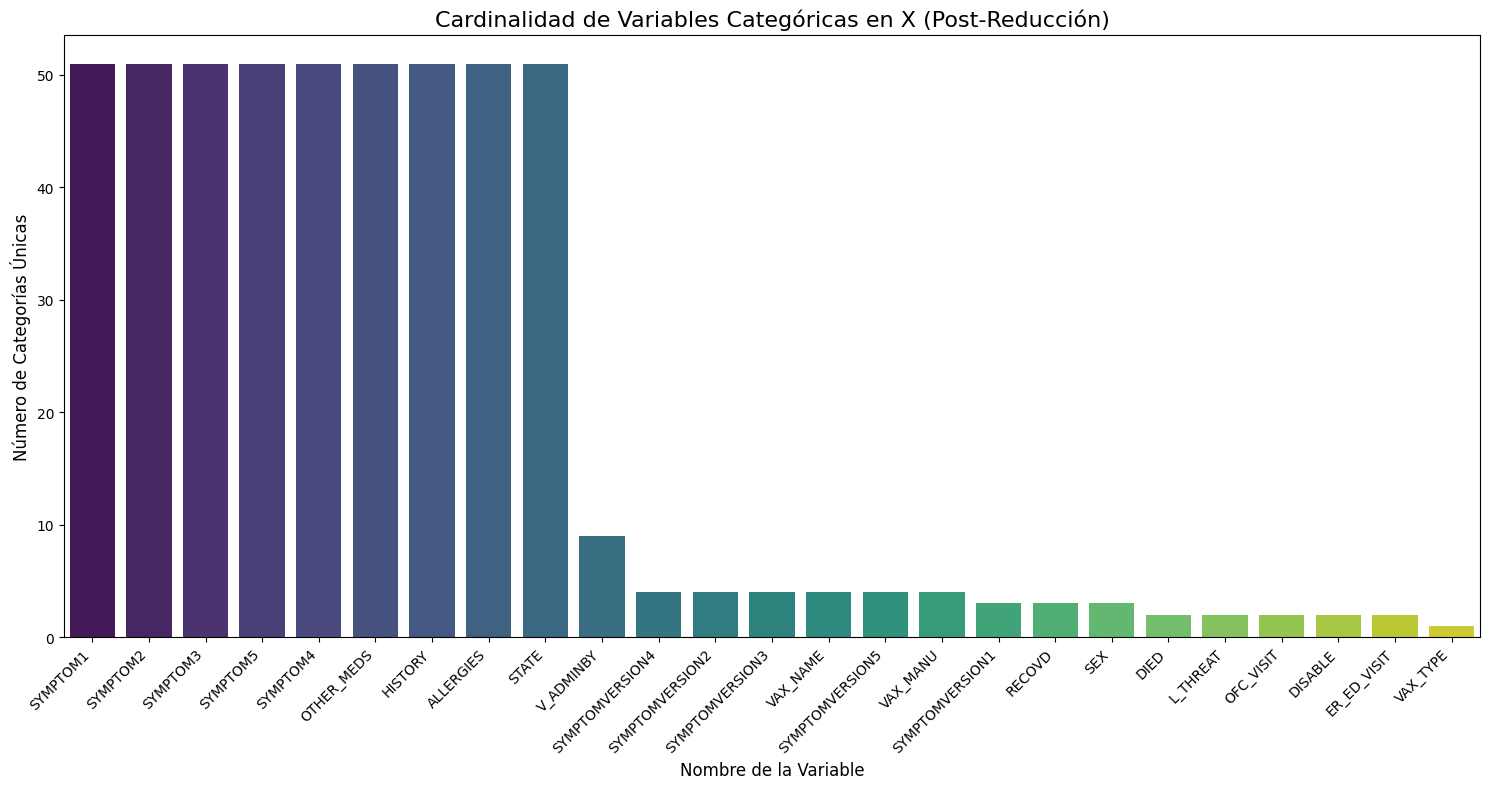

La suma total de categorías en X (Post-Reducción) es: 512


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Asumimos que 'X' es tu DataFrame después de la limpieza, extracción manual de features
# y reducción de cardinalidad de las variables categóricas
# Selecciona solo las columnas que son de tipo 'object' o 'category' en X
columnas_categoricas_X = X.select_dtypes(include=['object', 'category']).columns

# Define las columnas a excluir (aunque ya no estén en X, para claridad)
columnas_a_excluir = ['SYMPTOM_TEXT', 'LAB_DATA', 'CUR_ILL']

# Filtra las columnas categóricas_X para excluir las que no deben estar en el gráfico
columnas_categoricas_para_graficar = [col for col in columnas_categoricas_X if col not in columnas_a_excluir]

# Calcula la cardinalidad (número de valores únicos) de cada una en X, solo para las columnas a graficar
cardinalidad_X = X[columnas_categoricas_para_graficar].nunique().sort_values(ascending=False)

# Grafica los resultados
plt.figure(figsize=(15, 8))
sns.barplot(x=cardinalidad_X.index, y=cardinalidad_X.values, palette='viridis')
plt.title('Cardinalidad de Variables Categóricas en X (Post-Reducción)', fontsize=16)
plt.ylabel('Número de Categorías Únicas', fontsize=12)
plt.xlabel('Nombre de la Variable', fontsize=12)
plt.xticks(rotation=45, ha="right") # Rota las etiquetas para que no se superpongan
plt.tight_layout() # Ajusta el gráfico para que todo quepa
plt.show()

print(f"La suma total de categorías en X (Post-Reducción) es: {cardinalidad_X.sum()}")

Como se observa en el Gráfico de cardinalidad de variables categóricas, pese a los pasos de reducción de la dimensionalidad aplicados anteriormente, el número tan alto de categorías en X a codificar (500) se puede deber a que Variables como **OTHER_MEDS**, **HISTORY** , **ALLERGIES**, o **STATE** son de texto libre. Si se incluyen en el cálculo de cardinalidad para One-Hot Encoding, cada una podría tener cientos de valores únicos, inflando demasiado el total de categorías.

Por este motivo, opté por aplicar una extracción manual de características de interés para estas variables.

### 3.2 Extracción Manual de Características para variables categóricas de texto libre.

La información que decidí extraer para cada variable fue:

- **HISTORY** (historial de enfermedades crónicas o de largo plazo): si tiene diabetes, asma o enfermedades cardíacas.
- **OTHER_MEDS** (otros medicamentos): si toma aspirina, ibuprofeno, estatinas o metformina (medicaciones comunes y potencialmente peligrosas en combinación con otros medicamentos).
- **ALLERGIES** (alergias): alergia al maní (peanuts), alergia a los mariscos (shellfish), alergia a la penicilina, alergia a sulfabactrim (antibiótico de uso común).
- **STATE**: decidí conservar solo las 10 categorías más frecuentes.

In [ ]:
# --- Manual Feature Extraction and Cardinality Reduction ---

# Use the DataFrame X which still contains the text and categorical columns
# Fill potential NaN values and convert to lowercase for robust matching
# Using .astype(str) to prevent errors on non-string data
X['HISTORY_lower'] = X['HISTORY'].astype(str).str.lower().fillna('')
X['OTHER_MEDS_lower'] = X['OTHER_MEDS'].astype(str).str.lower().fillna('')
X['ALLERGIES_lower'] = X['ALLERGIES'].astype(str).str.lower().fillna('')

# --- Create features from the 'HISTORY' column ---
history_keywords = {
    'history_has_diabetes': 'diabet',
    'history_has_asthma': 'asthma',
    'history_has_cardiac_issues': 'cardiac|heart|hypertens'
}
for col_name, keyword in history_keywords.items():
    X[col_name] = X['HISTORY_lower'].str.contains(keyword).astype(int)

# --- Create features from the 'OTHER_MEDS' column ---
meds_keywords = {
    'takes_aspirin': 'aspirin|aas',
    'takes_ibuprofen': 'ibuprofen|motrin|advil',
    'takes_statins': 'statin|lipitor|crestor',
    'takes_metformin': 'metformin'
}
for col_name, keyword in meds_keywords.items():
    X[col_name] = X['OTHER_MEDS_lower'].str.contains(keyword).astype(int)

# --- Create features from the 'ALLERGIES' column ---
allergy_keywords = {
    'allergy_to_penicillin': 'penicillin',
    'allergy_to_sulfa': 'sulfa|bactrim',
    'allergy_to_peanuts': 'peanut',
    'allergy_to_shellfish': 'shellfish|shrimp'
}
for col_name, keyword in allergy_keywords.items():
    X[col_name] = X['ALLERGIES_lower'].str.contains(keyword).astype(int)

# --- Reduce Cardinality for 'STATE' column ---
# Find the 10 most frequent states
top_10_states = X['STATE'].value_counts().nlargest(10).index
# Group all other states into an 'OTHER' category in a new column
X['STATE_grouped'] = np.where(X['STATE'].isin(top_10_states), X['STATE'], 'OTHER')


# --- Clean up and review ---
# Drop the original text/high-cardinality columns and temporary lowercase columns from X
X = X.drop(columns=[
    'HISTORY', 'OTHER_MEDS', 'ALLERGIES', 'STATE',
    'HISTORY_lower', 'OTHER_MEDS_lower', 'ALLERGIES_lower'
])

# Display the first few rows of X with the new features
print("DataFrame X with new features and reduced cardinality:")
display(X.head())

# Check the new dimensions and data types of X
print("\nNew DataFrame X info:")
X.info()

DataFrame X with new features and reduced cardinality:


,SYMPTOM1,SYMPTOMVERSION1,SYMPTOM2,SYMPTOMVERSION2,SYMPTOM3,SYMPTOMVERSION3,SYMPTOM4,SYMPTOMVERSION4,SYMPTOM5,SYMPTOMVERSION5,...,history_has_cardiac_issues,takes_aspirin,takes_ibuprofen,takes_statins,takes_metformin,allergy_to_penicillin,allergy_to_sulfa,allergy_to_peanuts,allergy_to_shellfish,STATE_grouped
0,Other,23.1,Other,23.1,Sin síntomas adicionales,Sin síntomas adicionales,Sin síntomas adicionales,Sin síntomas adicionales,Sin síntomas adicionales,Sin síntomas adicionales,...,0,0,0,0,0,0,0,0,0,TX
1,Anxiety,23.1,Dyspnoea,23.1,Sin síntomas adicionales,Sin síntomas adicionales,Sin síntomas adicionales,Sin síntomas adicionales,Sin síntomas adicionales,Sin síntomas adicionales,...,0,0,0,0,0,0,0,0,0,CA
2,Chest discomfort,23.1,Other,23.1,Pain in extremity,23.1,Other,23.1,Sin síntomas adicionales,Sin síntomas adicionales,...,0,0,0,0,0,0,0,0,1,OTHER
3,Dizziness,23.1,Fatigue,23.1,Other,23.1,Sin síntomas adicionales,Sin síntomas adicionales,Sin síntomas adicionales,Sin síntomas adicionales,...,0,0,0,0,0,0,0,0,0,OTHER
4,Injection site erythema,23.1,Injection site pruritus,23.1,Injection site swelling,23.1,Injection site warmth,23.1,Sin síntomas adicionales,Sin síntomas adicionales,...,0,0,0,0,0,0,0,0,0,TX



New DataFrame X info:
<class 'pandas.core.frame.DataFrame'>
Index: 811681 entries, 0 to 890835
Data columns (total 38 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   SYMPTOM1                    811681 non-null  object 
 1   SYMPTOMVERSION1             811681 non-null  object 
 2   SYMPTOM2                    811681 non-null  object 
 3   SYMPTOMVERSION2             811681 non-null  object 
 4   SYMPTOM3                    811681 non-null  object 
 5   SYMPTOMVERSION3             811681 non-null  object 
 6   SYMPTOM4                    811681 non-null  object 
 7   SYMPTOMVERSION4             811681 non-null  object 
 8   SYMPTOM5                    811681 non-null  object 
 9   SYMPTOMVERSION5             811681 non-null  object 
 10  VAX_TYPE                    811681 non-null  object 
 11  VAX_MANU                    811681 non-null  object 
 12  VAX_DOSE_SERIES             711313 non-null  float64
 

### 3.3 Consolidación de las variables SYMPTOM 1 a 5 para la Reducción de la Cardinalidad

Las variables **SYMPTOM1** a **SYMPTOM5**, siguen aumentando mucho la dimensionalidad del DataFrame dada su alta cardinalidad, estas variables NO son texto libre: Son los términos MedDRA estandarizados que los codificadores profesionales extraen del SYMPTOM_TEXT. MedDRA es un diccionario médico internacional con más de 17.000 términos.

El número de posibles términos MedDRA es tan grande que aplicarles One-Hot Encoding directamente causará que se agote la memoria RAM. Por lo tanto, se empleará una selección de características por frecuencia sobre los términos MedDRA. En lugar de tratar con miles de posibles síntomas, dejaré solo los más comunes, que probablemente sean los que tengan mayor poder predictivo.

El siguiente código realiza los siguientes pasos:

- Identifica los **50 términos** MedDRA más frecuentes en todo el conjunto de datos.

- Crea 50 nuevas columnas binarias, donde cada una representa uno de esos términos principales.

- Marca con un 1 si un reporte contiene ese término MedDRA en cualquiera de sus 5 campos de síntomas.

- Elimina las 10 columnas originales de síntomas y sus versiones.

In [ ]:
# --- Step 1: Find the most common MedDRA terms across all 5 symptom columns ---

# Define the MedDRA term columns as per the documentation
meddra_term_cols = ['SYMPTOM1', 'SYMPTOM2', 'SYMPTOM3', 'SYMPTOM4', 'SYMPTOM5']

# Stack all MedDRA term columns into a single Series to count frequencies
# This combines all reported terms into one long list
all_meddra_terms = df[meddra_term_cols].stack()

# Calculate the frequency of each term and get the top N most common ones.
# 50 is a good starting point, you can adjust this number.
N_TOP_TERMS = 50
top_meddra_terms = all_meddra_terms.value_counts().nlargest(N_TOP_TERMS).index

print(f"Identified the top {N_TOP_TERMS} most frequent MedDRA terms.")


# --- Step 2: Create new binary features for these top terms ---

print("Creating new binary features for top MedDRA terms...")
# For each top term, create a new column in the main DataFrame
for term in top_meddra_terms:
    # Create a clean column name
    # Example: 'Headache' -> 'symptom_headache'
    col_name = f'symptom_{term.lower().replace(" ", "_")}'

    # The new column is 1 if the term appears in ANY of the 5 original columns, 0 otherwise
    df[col_name] = df[meddra_term_cols].isin([term]).any(axis=1).astype(int)


# --- Step 3: Clean up the original symptom-related columns ---

# Define all original columns to drop as per the documentation
# (SYMPTOM1-5 and SYMPTOMVERSION1-5)
cols_to_drop = [
    'SYMPTOM1', 'SYMPTOMVERSION1',
    'SYMPTOM2', 'SYMPTOMVERSION2',
    'SYMPTOM3', 'SYMPTOMVERSION3',
    'SYMPTOM4', 'SYMPTOMVERSION4',
    'SYMPTOM5', 'SYMPTOMVERSION5'
]
df = df.drop(columns=cols_to_drop)

print("\nOriginal MedDRA term columns replaced with 50 binary features.")
print("New shape of the DataFrame:", df.shape)
display(df.head())

Identified the top 50 most frequent MedDRA terms.
Creating new binary features for top MedDRA terms...

Original MedDRA term columns replaced with 50 binary features.
New shape of the DataFrame: (811681, 78)


,VAERS_ID,VAX_TYPE,VAX_MANU,VAX_DOSE_SERIES,VAX_NAME,RECVDATE,STATE,AGE_YRS,SEX,SYMPTOM_TEXT,...,symptom_tinnitus,symptom_tremor,symptom_vaccination_site_pain,symptom_heart_rate_increased,symptom_back_pain,symptom_condition_aggravated,symptom_sars-cov-2_test,symptom_injection_site_rash,symptom_decreased_appetite,symptom_feeling_hot
0,916600,COVID19,MODERNA,1.0,COVID19 (COVID19 (MODERNA)),2021-01-01,TX,33.0,F,Right side of epiglottis swelled up and hinder...,...,0,0,0,0,0,0,0,0,0,0
1,916601,COVID19,MODERNA,1.0,COVID19 (COVID19 (MODERNA)),2021-01-01,CA,73.0,F,Approximately 30 min post vaccination administ...,...,0,0,0,0,0,0,0,0,0,0
2,916602,COVID19,PFIZER\BIONTECH,1.0,COVID19 (COVID19 (PFIZER-BIONTECH)),2021-01-01,WA,23.0,F,"About 15 minutes after receiving the vaccine, ...",...,0,0,0,0,0,0,0,0,0,0
3,916603,COVID19,MODERNA,NaN,COVID19 (COVID19 (MODERNA)),2021-01-01,WA,58.0,F,"extreme fatigue, dizziness,. could not lift my...",...,0,0,0,0,0,0,0,0,0,0
4,916604,COVID19,MODERNA,1.0,COVID19 (COVID19 (MODERNA)),2021-01-01,TX,47.0,F,"Injection site swelling, redness, warm to the ...",...,0,0,0,0,0,0,0,0,0,0


### **4. Codificación de variables Categóricas**

Los modelos de machine learning, como la regresión logística, operan matemáticamente con datos numéricos. Por este motivo, es un paso esencial  transformar las variables categóricas (aquellas basadas en texto o etiquetas) a un formato numérico que el algoritmo pueda interpretar.

Se empleó la técnica de One-Hot Encoding. Este método crea una nueva columna binaria (con valores de 0 o 1) por cada categoría única presente en una variable, indicando la presencia o ausencia de dicha categoría para cada registro. Se utilizó el parámetro drop_first=True para eliminar una de las columnas resultantes por cada variable original, lo cual previene la multicolinealidad y reduce la redundancia en el conjunto de datos.

In [ ]:
# Select only the columns of type 'object' that need to be encoded
categorical_cols = X.select_dtypes(include=['object']).columns

# Apply One-Hot Encoding
# drop_first=True helps to reduce multicollinearity
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Check the new dimensions
print("Dimensions after One-Hot Encoding:", X_encoded.shape)

Dimensions after One-Hot Encoding: (811681, 313)


### **5. Imputación de Valores Faltantes**

Se añade un paso de Imputar con la mediana los valores nulos  que se puedan haber generado (pese a la limpieza previa) en el procesamiento de los datos.

In [ ]:
# --- Manual Imputation to Save Memory ---

print("Starting manual imputation...")

# 1. Find only the columns that actually have missing values
cols_with_na = X_encoded.columns[X_encoded.isnull().any()].tolist()

if not cols_with_na:
    print("No columns with NaN values found. Skipping imputation.")
else:
    print(f"Found {len(cols_with_na)} columns with NaN values: {cols_with_na}")

    # 2. Loop through only those columns and fill NaNs in-place
    for col in cols_with_na:
        # Calculate the median for the current column
        median_value = X_encoded[col].median()

        # Fill the missing values in the original DataFrame without creating a copy
        X_encoded[col].fillna(median_value, inplace=True)
        print(f"Imputed column '{col}' with median value {median_value}.")

print("\nManual imputation complete.")
# Now X_encoded is fully imputed and ready for the next step (scaling)

Starting manual imputation...
Found 1 columns with NaN values: ['VAX_DOSE_SERIES']
Imputed column 'VAX_DOSE_SERIES' with median value 1.0.

Manual imputation complete.


### **6. Escalado de los datos**

El objetivo principal del escalado es asegurar que todas las características (columnas) contribuyan de manera justa al resultado del modelo, sin que ninguna domine a las demás solo por tener valores numéricos más grandes.

Este paso asegura que el modelo de regresión logística aprenda la verdadera importancia de cada característica por su poder predictivo, no por su escala arbitraria. Esto conduce a un **entrenamiento más rápido y a un modelo más preciso y fiable.**

In [ ]:
from sklearn.preprocessing import StandardScaler

# --- Create a scaler object ---
scaler = StandardScaler()

# --- Fit and transform the imputed data ---
print("Scaling the imputed and encoded data...")
# The input is your dataframe X_encoded, which now has no missing values
# The output will be a NumPy array, ready for the next steps
X_scaled = scaler.fit_transform(X_encoded)

print("Data scaling complete.")
print("The data is now scaled and stored in the 'X_scaled' variable.")

Scaling the imputed and encoded data...
Data scaling complete.
The data is now scaled and stored in the 'X_scaled' variable.


### **6. División de Datos (80/20)**

El siguiente código:

- **Divide los datos**: Separa tus características (X_scaled) y tu objetivo (y) en dos grupos. El modelo aprenderá **usando el 80% de los datos (X_train, y_train).**

- **Reserva datos para la prueba**: El 20% restante (X_test, y_test) se guarda. El modelo nunca verá estos datos durante el entrenamiento. Se usarán al final para evaluar qué tan bien generaliza y hace predicciones el modelo de regresión logística sobre información nueva.

- **Asegura la reproducibilidad**: random_state=42 actúa como una "semilla" para la aleatoriedad, garantizando que si se vuelve a ejecutar el código, la división será exactamente la misma.

- **Mantiene el balance**: stratify=y asegura que la proporción de cada clase en la variable objetivo sea la misma tanto en el conjunto de entrenamiento como en el de prueba, lo que es fundamental para una evaluación fiable.

- **Libera la memoria de la variable X_scaled** al final, lo cual es muy importante para que el siguiente paso (el entrenamiento del modelo) tenga la mayor cantidad de RAM disponible.

In [ ]:
from sklearn.model_selection import train_test_split
import gc

# --- Step 1: Split the data into training and testing sets ---
print("Splitting the data...")

# We use an 80/20 split.
# stratify=y ensures the class proportions are the same in the train and test sets.
# random_state=42 ensures the split is reproducible.
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled,
    y,
    test_size=0.20,
    random_state=42,
    stratify=y
)

print("Data successfully split.")
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)

# --- Step 2: Free up memory ---
# We no longer need the full X_scaled array, so we delete it.
del X_scaled
gc.collect()
print("\nMemory from X_scaled has been released.")

Splitting the data...
Data successfully split.
Shape of X_train: (649344, 313)
Shape of X_test: (162337, 313)

Memory from X_scaled has been released.


###**7. Entrenamiento del Modelo de Regresión Logística**

En este paso, se instancia y entrena el modelo de Regresión Logística. Se utiliza exclusivamente el conjunto de datos de entrenamiento (X_train, y_train) para que el algoritmo aprenda los patrones que relacionan las características con la variable objetivo HOSPITAL. Se selecciona el solver 'saga' por su eficiencia con datasets grandes y se establece un random_state para garantizar la reproducibilidad de los resultados.



In [ ]:
from sklearn.linear_model import LogisticRegression

# --- Step 1: Create and train the model ---

# We use the 'saga' solver, which is efficient for large datasets.
# max_iter is increased to ensure the model has enough iterations to converge.
# random_state is set for reproducibility.
log_reg_model = LogisticRegression(solver='saga', max_iter=1000, random_state=42)

print("Training the Logistic Regression model...")

# The .fit() method is where the model learns from the training data
log_reg_model.fit(X_train, y_train)

print("Model training completed successfully!")

Training the Logistic Regression model...
Model training completed successfully!


Guardar el Modelo de Regresión Logística ya entrenado (el código de entrenamiento del modelo tardó 1 hora 10 minutos en ejecutarse):

In [ ]:
import joblib

# Guardar el modelo entrenado
# Assumes your trained model is in the 'log_reg_model' variable
joblib.dump(log_reg_model, 'modelo_regresion_logistica.joblib')

print("¡Modelo guardado exitosamente en el archivo 'modelo_regresion_logistica.joblib'!")

¡Modelo guardado exitosamente en el archivo 'modelo_regresion_logistica.joblib'!


### **8. Predicciones**

Una vez entrenado el modelo, se procede a evaluar su capacidad de generalización sobre datos que no ha visto previamente. Para ello, se utiliza el modelo para predecir la variable objetivo (HOSPITAL) sobre el conjunto de prueba (X_test). Estas predicciones se almacenarán y compararán con los valores reales (y_test) para medir el rendimiento del modelo.

In [ ]:
# --- Make predictions on the test set ---
print("Making predictions on the test set (X_test)...")

# The .predict() method uses the trained model to predict the outcome for the test data
y_pred = log_reg_model.predict(X_test)

print("Predictions made successfully!")

# --- Display the first few predictions ---
# This shows you what the model's output looks like
print("\nFirst 10 predictions:", y_pred[:10])
print("Actual first 10 values:", y_test[:10].values)

Making predictions on the test set (X_test)...
Predictions made successfully!

First 10 predictions: ['No Hospitalization' 'No Hospitalization' 'No Hospitalization'
 'No Hospitalization' 'No Hospitalization' 'No Hospitalization'
 'No Hospitalization' 'No Hospitalization' 'No Hospitalization'
 'No Hospitalization']
Actual first 10 values: ['No Hospitalization' 'No Hospitalization' 'No Hospitalization'
 'No Hospitalization' 'No Hospitalization' 'No Hospitalization'
 'No Hospitalization' 'No Hospitalization' 'No Hospitalization'
 'No Hospitalization']


# 10. Evaluación del Modelo de Regresión Logística 📝

Métricas del Modelo - Categorías más Relevantes para la Predicción de la variable Target

#### **10.1 Matriz de confusión: Predicción de Hospitalización y Exactitud (Accuracy) del Modelo**

Para cuantificar el rendimiento del modelo de regresión logística, se calculan dos métricas fundamentales utilizando el conjunto de prueba: la exactitud (accuracy) y la matriz de confusión.

- La **Exactitud (Accuracy)** es la medida más directa del rendimiento y representa el porcentaje total de predicciones que el modelo realizó correctamente. Aunque es una métrica útil, se debe interpretar con cautela, especialmente en datasets con clases desbalanceadas.

- La **Matriz de Confusión** proporciona un desglose detallado de los aciertos y errores del modelo. Esta visualización nos permite entender no solo cuántas predicciones fueron correctas, sino también el tipo de error que el modelo comete. La matriz se compone de cuatro cuadrantes:

    - **Verdaderos Negativos** (TN): Casos negativos que el modelo clasificó correctamente.

    - **Falsos Positivos** (FP): Casos negativos que el modelo clasificó incorrectamente como positivos (Error Tipo I).

    - **Falsos Negativos** (FN): Casos positivos que el modelo clasificó incorrectamente como negativos (Error Tipo II).

    - **Verdaderos Positivos** (TP): Casos positivos que el modelo clasificó correctamente.

El análisis de esta matriz es crucial para comprender el comportamiento real del modelo y calcular métricas más específicas como la sensibilidad y la especificidad.

Exactitud (Accuracy) del modelo: 92.82%


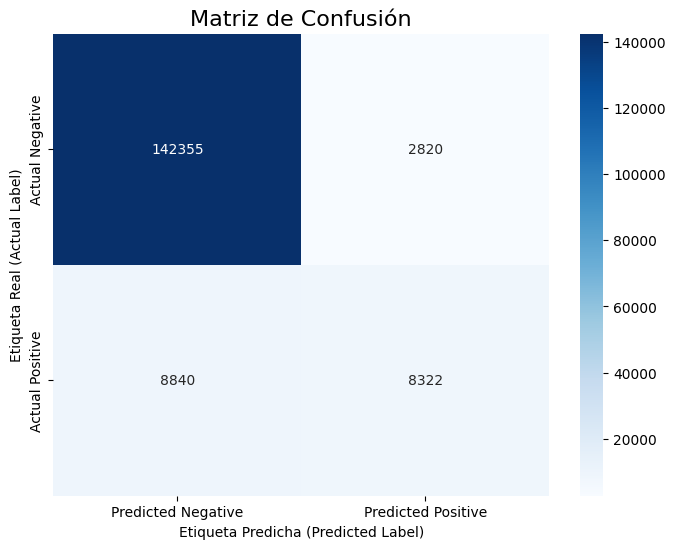

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# --- Step 1: Calculate Accuracy ---
# Accuracy is the proportion of correct predictions out of the total.
accuracy = accuracy_score(y_test, y_pred)

print(f"Exactitud (Accuracy) del modelo: {accuracy:.2%}")


# --- Step 2: Generate and plot the Confusion Matrix ---
# The confusion matrix shows the details of correct and incorrect predictions.
cm = confusion_matrix(y_test, y_pred)

# Plotting the matrix using a heatmap for better visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])

plt.title('Matriz de Confusión', fontsize=16)
plt.ylabel('Etiqueta Real (Actual Label)')
plt.xlabel('Etiqueta Predicha (Predicted Label)')
plt.show()

#### **10.2 Especificidad del Modelo de Regresión Logística**

La **Especificidad, también conocida como la Tasa de Verdaderos Negativos**, es una métrica clave que mide la capacidad del modelo para identificar correctamente los casos negativos.

En el contexto de este problema, la especificidad responde a la pregunta:
- **De todos los individuos que en realidad no requirieron hospitalización, ¿qué porcentaje fue clasificado correctamente por el modelo?**

Se calcula dividiendo los Verdaderos Negativos (TN) entre el total de negativos reales (TN + Falsos Positivos).

Una alta especificidad es importante porque indica que el modelo es fiable al identificar a la población que no sufre el evento de interés, minimizando los falsos positivos o "falsas alarmas".

In [ ]:
from sklearn.metrics import confusion_matrix

# --- Calculate Specificity from the Confusion Matrix ---

# Calculate the confusion matrix again
cm = confusion_matrix(y_test, y_pred)

# Extract the values: True Negatives (TN), False Positives (FP),
# False Negatives (FN), and True Positives (TP)
tn, fp, fn, tp = cm.ravel()

# Calculate specificity
# Specificity = True Negatives / (True Negatives + False Positives)
specificity = tn / (tn + fp)

print(f"Especificidad del modelo: {specificity:.2%}")

Especificidad del modelo: 98.06%


#### **10.3 Métricas de Clasificación: Precisión y Sensibilidad (Recall)**

Para obtener una visión más detallada del rendimiento del modelo sobre la clase positiva (pacientes hospitalizados), se analizan:

- **La Precisión (Precision)**
Mide la calidad de las predicciones positivas del modelo. Responde a la pregunta: **De todos los pacientes que el modelo predijo que serían hospitalizados, ¿qué porcentaje realmente lo fue?**

Una alta precisión indica que el modelo es muy fiable cuando afirma que un paciente requiere hospitalización, minimizando los Falsos Positivos.

- **La Sensibilidad (Recall)**
También conocida como tasa de verdaderos positivos, mide la capacidad del modelo para encontrar todos los casos positivos reales. Responde a la pregunta: **De todos los pacientes que realmente fueron hospitalizados, ¿qué porcentaje logró identificar el modelo?**

Una alta sensibilidad es fundamental en problemas médicos, ya que indica que el modelo es eficaz para detectar a los individuos que necesitan atención, minimizando los Falsos Negativos.

In [ ]:
from sklearn.metrics import classification_report

# This report provides precision and recall for each class
print("--- Classification Report ---")
print(classification_report(y_test, y_pred))

--- Classification Report ---
                    precision    recall  f1-score   support

No Hospitalization       0.94      0.98      0.96    145175
                 Y       0.75      0.48      0.59     17162

          accuracy                           0.93    162337
         macro avg       0.84      0.73      0.77    162337
      weighted avg       0.92      0.93      0.92    162337



## 10.4 Resumen de las métricas del Modelo de Regresión Logística

| Métrica | Valor | Interpretación en el Contexto del Problema |
| :--- | :--- | :--- |
| **Exactitud** | 92.82% | Aciertos totales (métrica influenciada por el desbalance). |
| **Sensibilidad (Recall)** | **48%** | **PUNTO DÉBIL:** Capacidad de encontrar pacientes que SÍ necesitan hospitalización. |
| **Especificidad** | 98.06% | **PUNTO FUERTE:** Capacidad de descartar pacientes que NO necesitan hospitalización. |
| **Precisión** | 75% | Fiabilidad de las alarmas de "posible hospitalización". |

## 10.5 Gráfico de Características más Influyentes en la Predicción de la Hospitalización

Este gráfico responde a la pregunta fundamental: “**¿Qué características aprendió el modelo que son más predictivas de una hospitalización?**”.

Para ello, se visualizan los coeficientes de regresión que el modelo asigna a cada característica. Estos coeficientes representan el impacto y la dirección de la influencia de cada variable en la predicción:

- **Coeficiente Positivo (barras azules)**: Indica que la presencia de esta característica aumenta la probabilidad de que el paciente sea hospitalizado. Cuanto más grande el valor, mayor es su impacto.

- **Coeficiente Negativo (barras rojas)**: Indica que la presencia de esta característica disminuye la probabilidad de que el paciente sea hospitalizado.

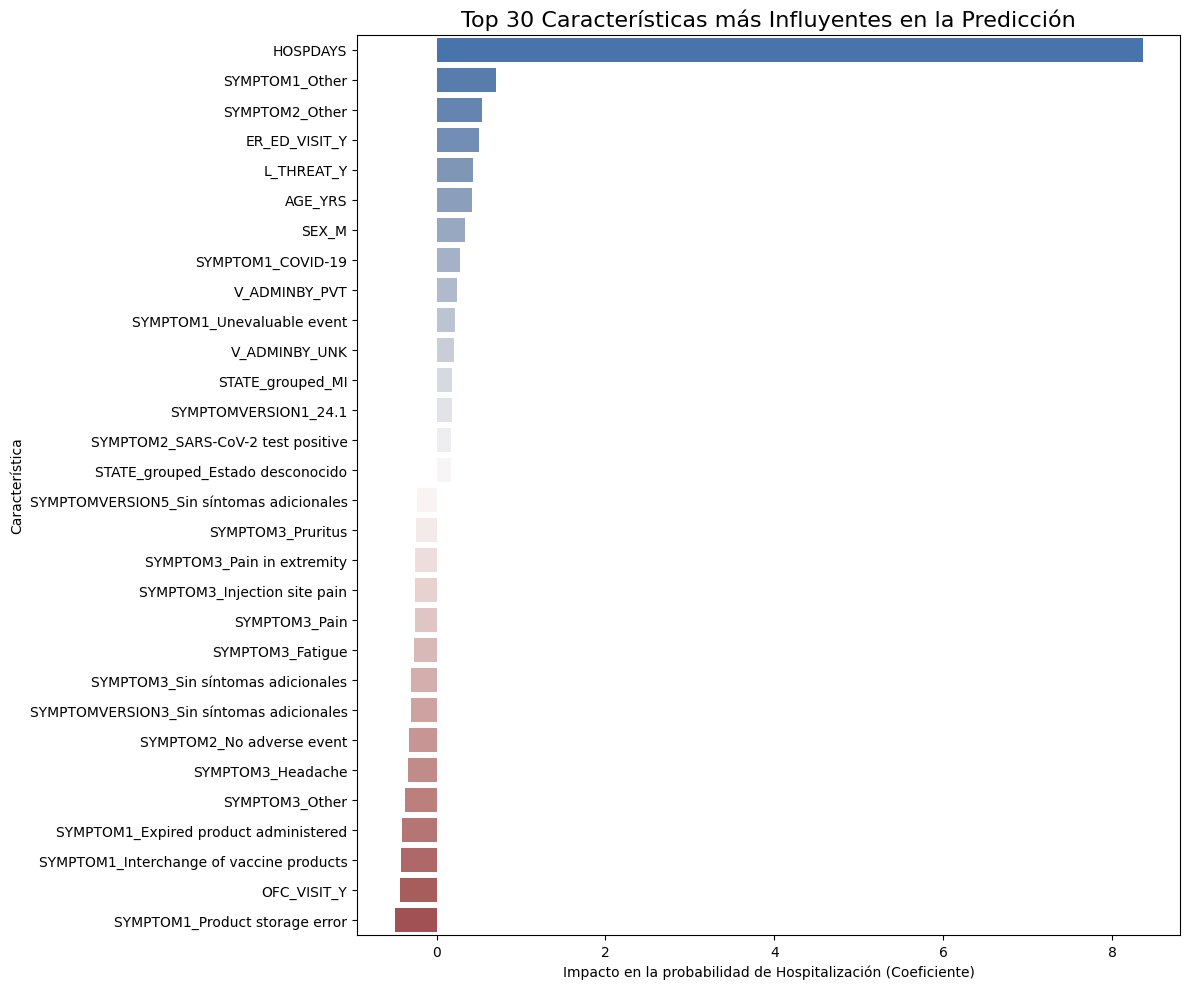

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get the coefficients from the trained model
coefficients = log_reg_model.coef_[0]

# Get the feature names from the encoded DataFrame (before scaling)
feature_names = X_encoded.columns

# Create a DataFrame to view them together
feature_importance = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort the features by their coefficient value
feature_importance = feature_importance.sort_values(by='Coefficient', ascending=False)

# Select the top N and bottom N features to plot
top_n = 15
top_features = pd.concat([feature_importance.head(top_n),
                          feature_importance.tail(top_n)])

# Plot
plt.figure(figsize=(12, 10))
sns.barplot(x='Coefficient', y='Feature', data=top_features, palette='vlag')
plt.title(f'Top {top_n*2} Características más Influyentes en la Predicción', fontsize=16)
plt.xlabel('Impacto en la probabilidad de Hospitalización (Coeficiente)')
plt.ylabel('Característica')
plt.tight_layout()
plt.show()

# 11. Discusión de Resultados 🔬

El **modelo de Regresión Logística** fue entrenado exitosamente utilizando un conjunto de entrenamiento del 80% de los datos preprocesados. La evaluación se realizó sobre el 20% restante, obteniendo una exactitud (accuracy) general del 92.82%.

- **El Paradigma del Modelo: Alta Exactitud, Bajo Impacto**

El modelo de Regresión Logística alcanzó una alta **exactitud (accuracy) del 92.82%**. Sin embargo, este resultado es engañoso y está directamente influenciado por el fuerte desbalance de clases en los datos, donde los casos de "No Hospitalización" son mayoritarios. La **alta especificidad (98.06%)** confirma que el modelo es experto en identificar a la clase negativa, pero este éxito en la mayoría de los casos enmascara una debilidad fundamental.


- **El Punto Crítico: La Falla en la Detección de Casos Positivos**

La debilidad crítica del modelo se revela en su **baja sensibilidad (recall), que es de solo un 48%**. Esto significa que el modelo **falla en detectar a más de la mitad de los pacientes que sí requirieron hospitalización**, identificando solo 8,322 de los 17,162 casos reales (como se muestra en la matri de confusión). Aunque su **precisión es del 75%** (es fiable cuando predice "positivo", es decir Hospitalizado), su incapacidad para encontrar la mayoría de los casos es el hallazgo más crítico.


❓**Interpretación del Modelo: ¿Qué Características son Clave para predecir la Hospitalización?**

El gráfico de importancia de características revela lo siguiente:

- **Los principales Predictores de Hospitalización (Coeficientes Positivos):**

**HOSPDAYS** (días de hospitalización), como era de esperar, fue la característica con mayor impacto positivo. Otras variables que aumentan significativamente la probabilidad de predicción de hospitalización incluyen las visitas a la sala de emergencias (**ER_ED_VISIT_Y**), la portación de enfermedades potencialmente mortales (**L_THREAT_Y**) y la edad del paciente (AGE_YRS).

- **Los principales Factores "Protectores" (Coeficientes Negativos)**:

Características como **SYMPTOM1_Product storage error** (error de almacenamiento del producto, es decir de la vacuna) o **OFC_VISIT_Y** (visita al consultorio) disminuyen la probabilidad de una predicción de hospitalización. Esto sugiere que el modelo aprendió a asociar errores de administración o visitas de rutina con eventos de menor severidad.

En general, este análisis confirma que **el modelo ha aprendido patrones clínicamente coherentes**, asociando la severidad de los síntomas y la demografía del paciente con el riesgo de hospitalización.

🚩 **Limitaciones Metodológicas**

Cabe destacar que el flujo de este proyecto fue moldeado por una restricción técnica fundamental: el límite de memoria RAM del entorno. Idealmente, las técnicas de reducción de dimensionalidad se explorarían en iteraciones posteriores para optimizar un modelo base. Sin embargo, en este caso, la optimización de características se convirtió en un prerrequisito fundamental para la viabilidad del modelado.

✅**Impacto de los Resultados**

El **bajo recall (48%)** es el hallazgo más crítico. En un escenario real, esto significaría que un sistema basado en este modelo no alertaría sobre más de la mitad de los casos de eventos adversos post-vacunación que terminan en la hospitalización del paciente. Este nivel de falsos negativos podría tener consecuencias graves, como retrasos en la atención médica.

Por otro lado, la alta especificidad (98.06%) y la buena precisión (75%) indican que el sistema sería fiable para reducir "falsas alarmas", permitiendo que los recursos se concentren en los casos que identifica como de alto riesgo, aunque omita muchos otros.

# 12. Conclusiones Finales y Propuestas Futuras 📋

**Conclusiones Finales**

El modelo de regresión logística alcanzó una alta exactitud del 92.82%, sin embrago este resultado se encuentra influenciado por el fuerte desbalance en los datos.
- La **principal debilidad es su baja sensibilidad (recall) del 48%**, lo que significa que no detecta a más de la mitad de los casos de hospitalización.

Se concluye que, si bien el modelo es un buen punto de partida, que ha logrado **aprender patrones clínicamente coherentes**, su utilidad clínica es limitada por el **alto riesgo de omitir casos positivos**. Por lo tanto, es fundamental que las próximas iteraciones se centren en mejorar la detección de esta clase minoritaria.


**Mejoras Futuras para el Modelo de Machine Learning**

Para que el modelo sea viable en un entorno práctico, la prioridad absoluta es aumentar la sensibilidad. Las próximas iteraciones deberían enfocarse en:

- El **Manejo del Desbalance de los Datos**: Implementar técnicas como el sobremuestreo de la clase minoritaria (SMOTE) o utilizar el parámetro class_weight='balanced' en el modelo para forzarlo a prestar más atención a los casos de hospitalización.

- La **Exploración de Otros Algoritmos**: Entrenar modelos más complejos y robustos ante el desbalance, como **Random Forest** o **Gradient Boosting** (XGBoost), que podrían capturar mejor las relaciones en los datos.

- **Ingeniería de Características Avanzada**: Utilizar técnicas de NLP (como TF-IDF) sobre las columnas de texto en lugar de la extracción manual, para capturar más información de las narrativas.


**Propuesta de Implementación Práctica**

Una vez mejorado, el modelo podría integrarse en un **sistema de triaje** o alerta temprana. No reemplazaría el juicio humano, sino que actuaría como una herramienta de apoyo para priorizar la revisión de reportes.

Los casos marcados por el modelo con un 'alto riesgo de hospitalización' serían escalados automáticamente a un especialista para su análisis. Adicionalmente, el sistema podría generar **alertas específicas** si un reporte contiene las características que el modelo identificó como de mayor impacto (ej. L_THREAT_Y;  ER_ED_VISIT_Y), incluso si la probabilidad general no es la más alta. Esto añade una capa extra de seguridad al sistema de triaje.

Esto **agilizaría la detección temprana de patrones y síntomas de riesgo en pacientes post-vacunación** y permitiría una intervención más rápida.